# Challenge 2 : phishing websites detection

Common imports :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas.api.types as ptypes
import seaborn as sns
import numpy as np

## Data Analysis

In [2]:
df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')
df = df.drop(columns=['URLSimilarityIndex', 'CharContinuationRate', 'URLTitleMatchScore', 'URLCharProb',
'TLDLegitimateProb'])
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,3,1,0,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,2,1,0,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,2,2,0,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,3,1,0,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,3,1,0,...,1,0,1,244,15,34,72,1,85,1


We can add some features such as :

In [3]:
# A high intensity of obfuscated character could be suspicious
df['ObfuscationIntensity'] = df['NoOfObfuscatedChar'] / df['DomainLength']

# Many interactions on a web page could be suspicious 
# Phising web sites could use pop ups and hidden fields to trap the victimes
df['InteractionRiskIndex'] = df['NoOfPopup'] + df['HasExternalFormSubmit'] + df['HasHiddenFields']

# A high media resource intensity could show a well developed and professional website 
df['MediaResourceIntensity'] = (df['NoOfImage'] + df['NoOfCSS'] + df['NoOfJS']) / df['URLLength']

# Hackers use interaction tools to collect sensitive informations
df['InteractionRichness'] = df['HasSubmitButton'] + df['HasPasswordField'] + df['HasSocialNet']
df['FormSecurityFlags'] = df['HasSubmitButton'] + df['HasPasswordField'] + df['HasExternalFormSubmit'] + df['HasHiddenFields']

# Hackers use redirection to trap people
df['RedirectionRisk'] = df['NoOfURLRedirect'] + df['NoOfSelfRedirect']

### Missing values and data types

In [4]:
missing_values = df.isnull().mean()
print(missing_values[missing_values>0])

Series([], dtype: float64)


No missing values ! (missing_values is empty)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   TLDLength                   235795 non-null  int64  
 8   NoOfSubDomain               235795 non-null  int64  
 9   HasObfuscation              235795 non-null  int64  
 10  NoOfObfuscatedChar          235795 non-null  int64  
 11  ObfuscationRatio            235795 non-null  float64
 12  NoOfLettersInURL            235795 non-null  int64  
 13  LetterRatioInU

In [28]:
stats = df.describe()
variances = df.select_dtypes(exclude='object').var()
stats.loc['variance'] = variances
stats.T

,count,mean,std,min,25%,50%,75%,max,variance
URLLength,235795.0,34.573095,41.314153,13.0,23.000,27.000000,34.000,6.097000e+03,1.706859e+03
DomainLength,235795.0,21.470396,9.150793,4.0,16.000,20.000000,24.000,1.100000e+02,8.373702e+01
IsDomainIP,235795.0,0.002706,0.051946,0.0,0.000,0.000000,0.000,1.000000e+00,2.698431e-03
TLDLength,235795.0,2.764456,0.599739,2.0,2.000,3.000000,3.000,1.300000e+01,3.596865e-01
NoOfSubDomain,235795.0,1.164758,0.600969,0.0,1.000,1.000000,1.000,1.000000e+01,3.611641e-01
HasObfuscation,235795.0,0.002057,0.045306,0.0,0.000,0.000000,0.000,1.000000e+00,2.052649e-03
NoOfObfuscatedChar,235795.0,0.024861,1.876249,0.0,0.000,0.000000,0.000,4.470000e+02,3.520311e+00
ObfuscationRatio,235795.0,0.000138,0.003817,0.0,0.000,0.000000,0.000,3.480000e-01,1.457109e-05
NoOfLettersInURL,235795.0,19.428919,29.090330,0.0,10.000,14.000000,20.000,5.191000e+03,8.462473e+02
LetterRatioInURL,235795.0,0.515946,0.123315,0.0,0.435,0.519000,0.594,9.260000e-01,1.520651e-02


In [5]:
categories = {}
var = {}
data = pd.DataFrame()

for col in df.select_dtypes(include='object').columns:
    categories[col] = df[col].unique().tolist()
    data[col + '_encoded'] = df[col].astype('category').cat.codes
    variance = data[col + '_encoded'].var()
    var[col] = variance

for col, cat in categories.items():
    print(f"Column '{col}' : {len(cat)} categories and var = {var[col]}")

Column 'FILENAME' : 235795 categories and var = 4633293151.666667
Column 'URL' : 235370 categories and var = 4616831238.329681
Column 'Domain' : 220086 categories and var = 4232909214.796515
Column 'TLD' : 695 categories and var = 20926.599272719683
Column 'Title' : 197874 categories and var = 3983227671.848595


# Correlation , scatterplot

In [6]:
dfnum = df.select_dtypes(include=['number'])

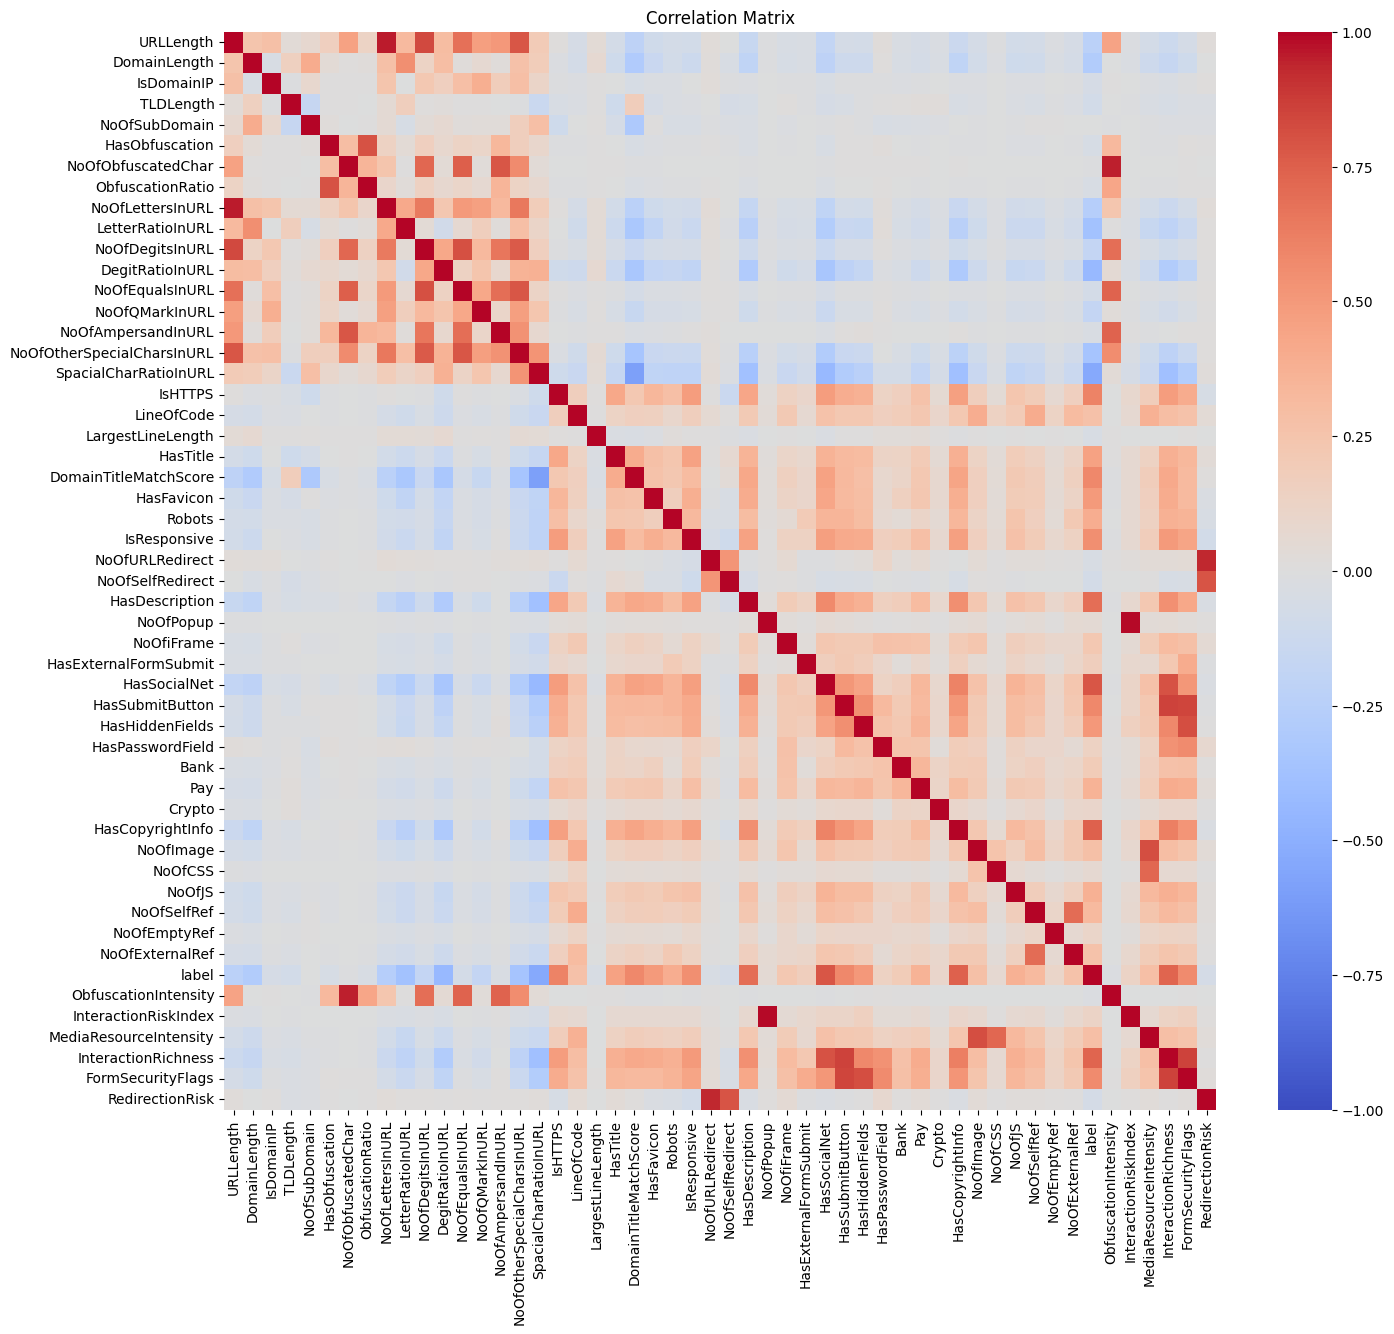

In [31]:
correlation_matrix_pearson = dfnum.corr(method='pearson') 

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix_pearson, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

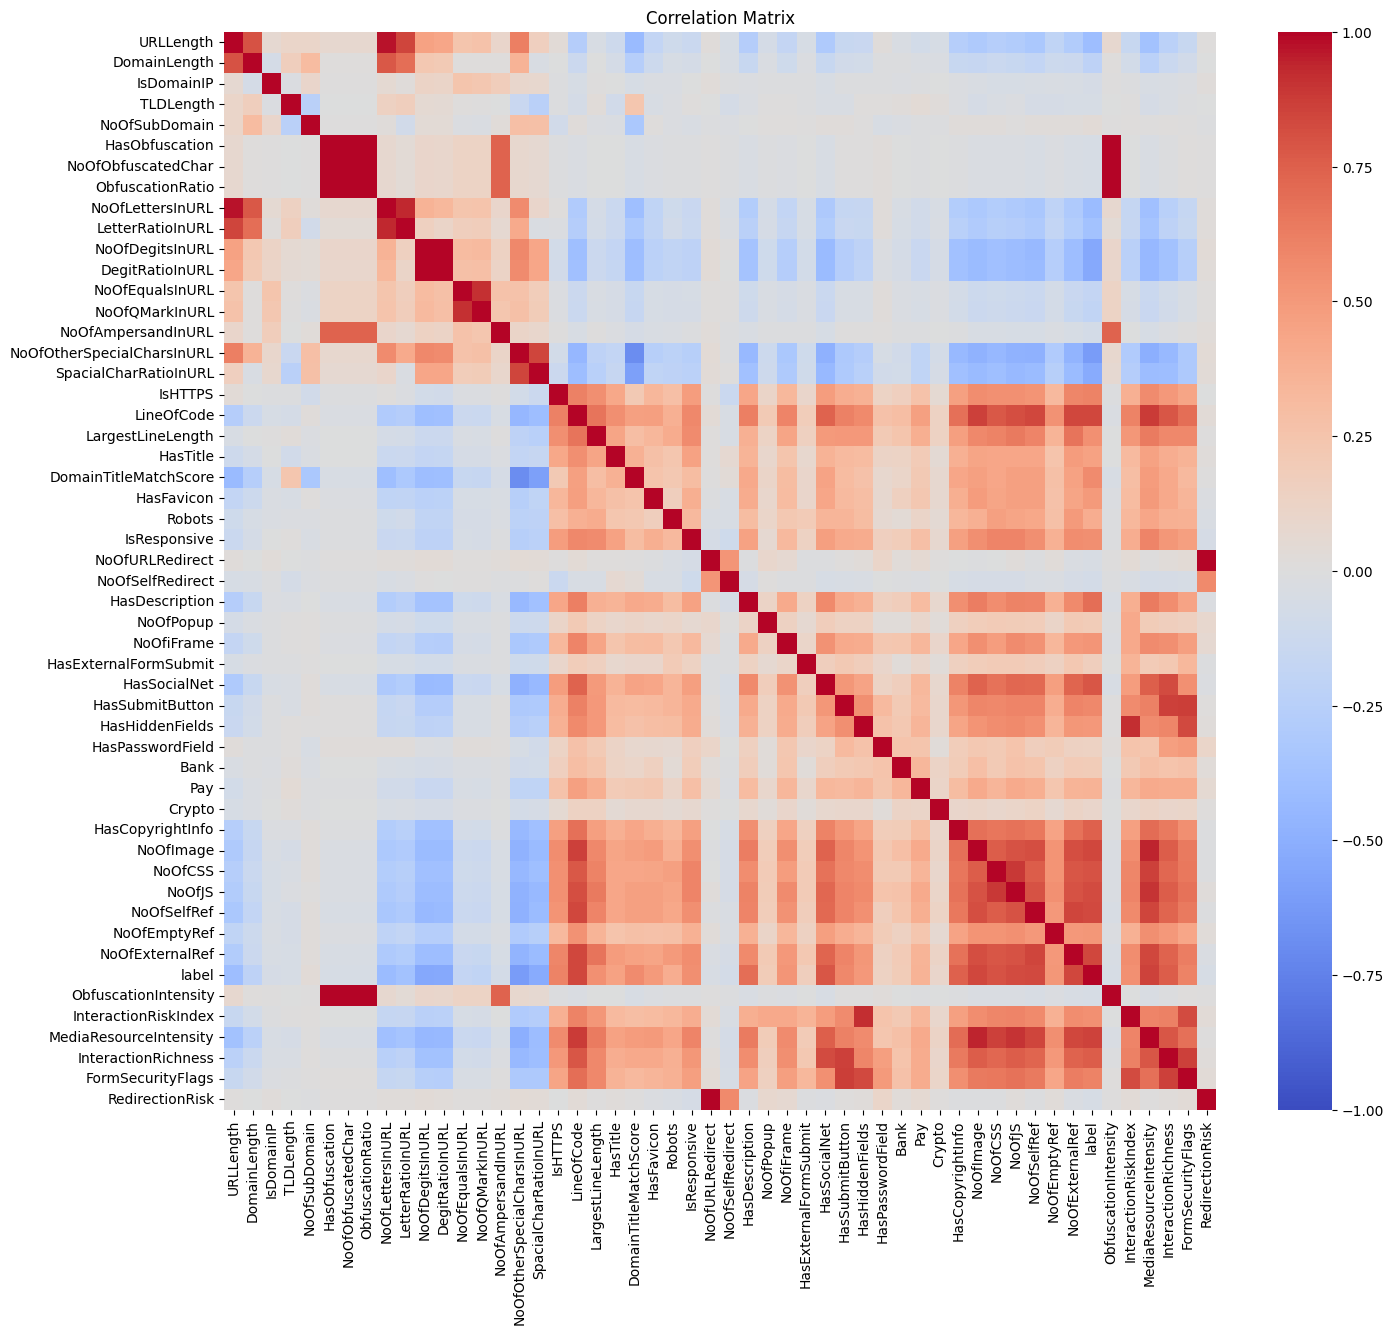

In [32]:
correlation_matrix_spearman = dfnum.corr(method='spearman')

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix_spearman, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

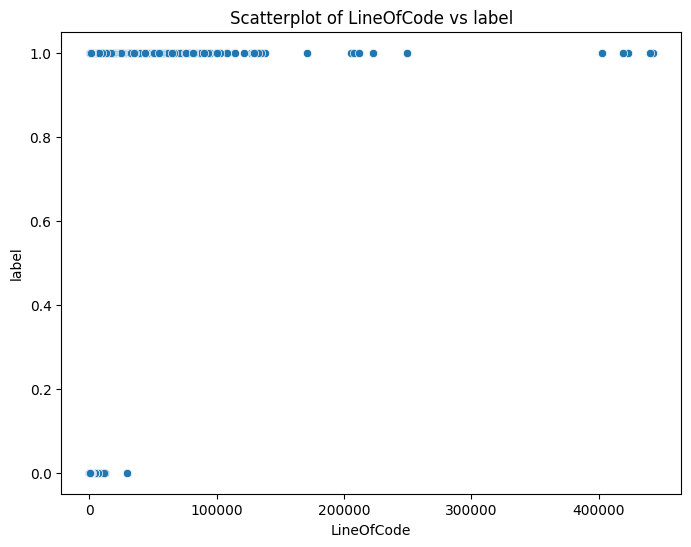

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dfnum, x='LineOfCode', y='label')
plt.title("Scatterplot of LineOfCode vs label")
plt.xlabel("LineOfCode")
plt.ylabel("label")
plt.show()


## Variable distribution ans outliers (boxplots)

To see the distribution of numeric variables and potential outliers, we use boxplots. 


In [34]:
def draw_boxplots(df):
    for column in df.columns:
        if ptypes.is_numeric_dtype(df[column]):
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=column, data=df, orient='v')
            plt.title(f'Boxplot of {column}')
            plt.show()

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


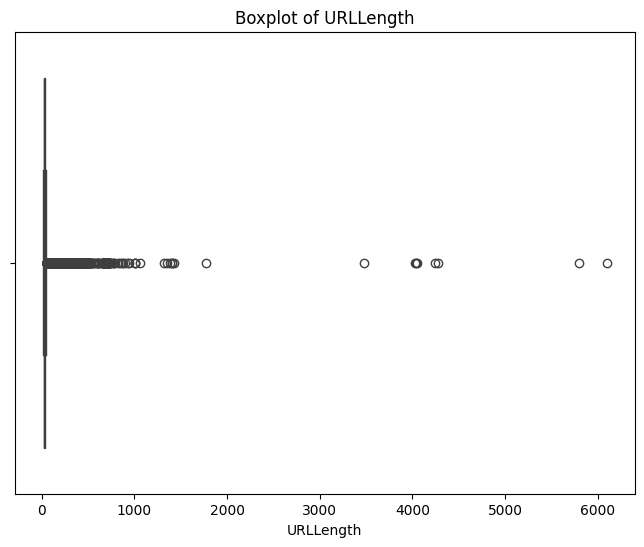

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


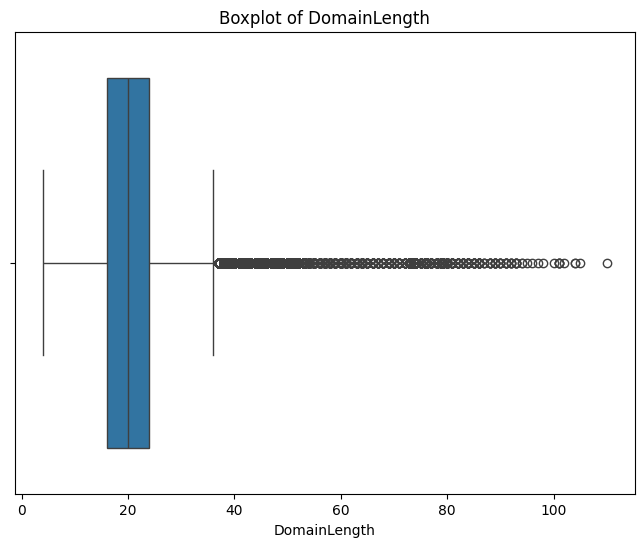

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


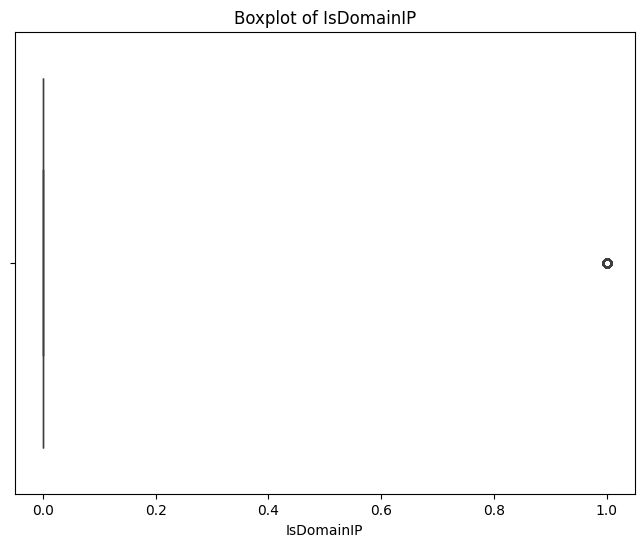

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


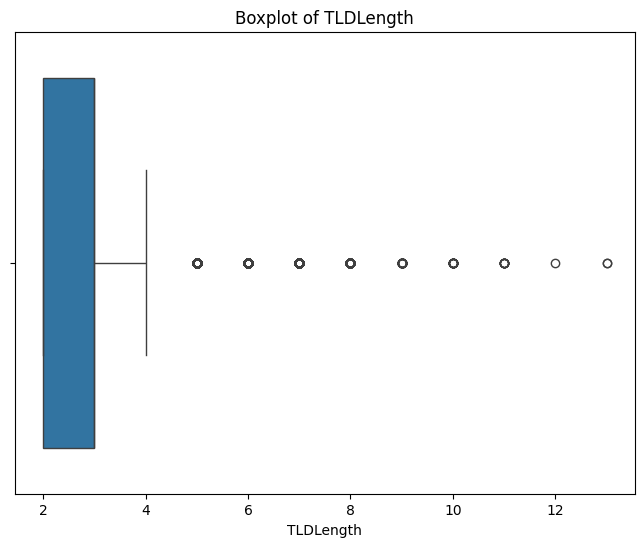

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


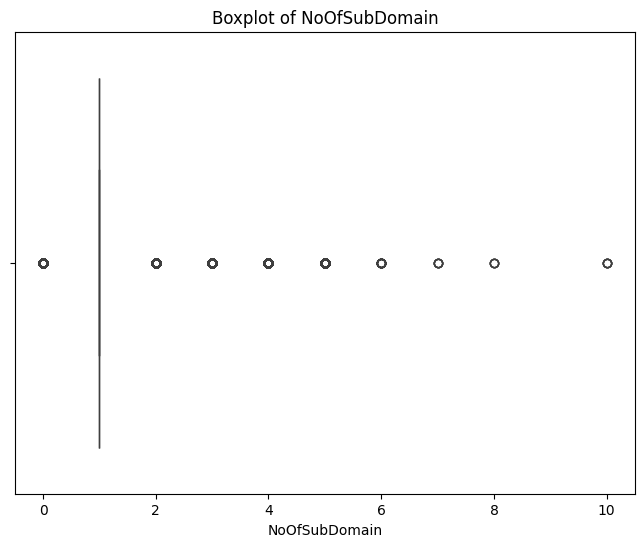

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


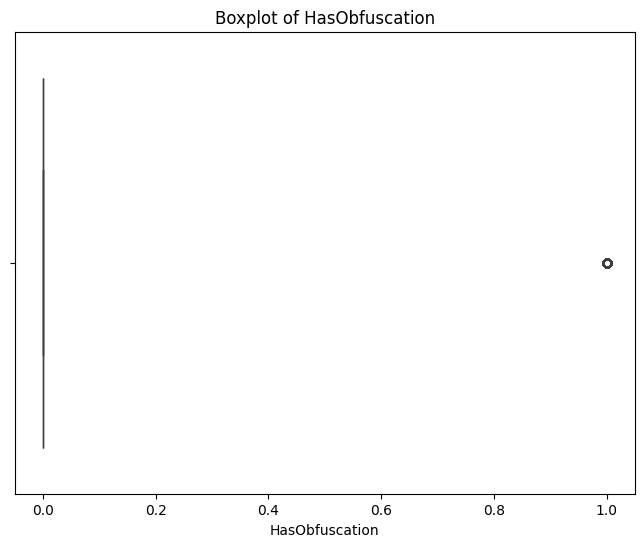

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


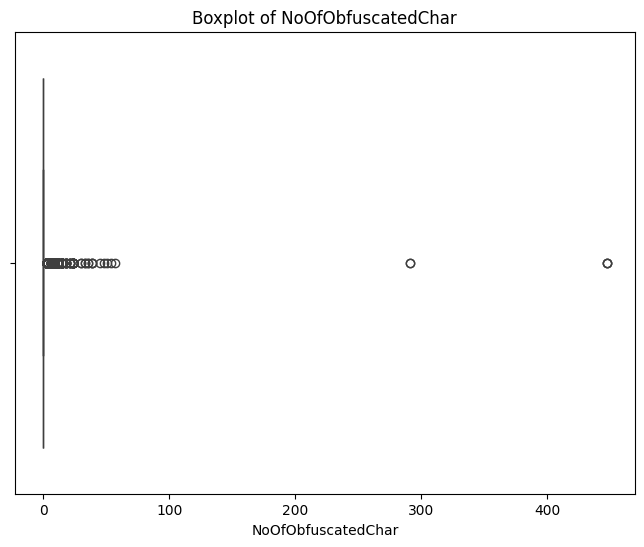

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


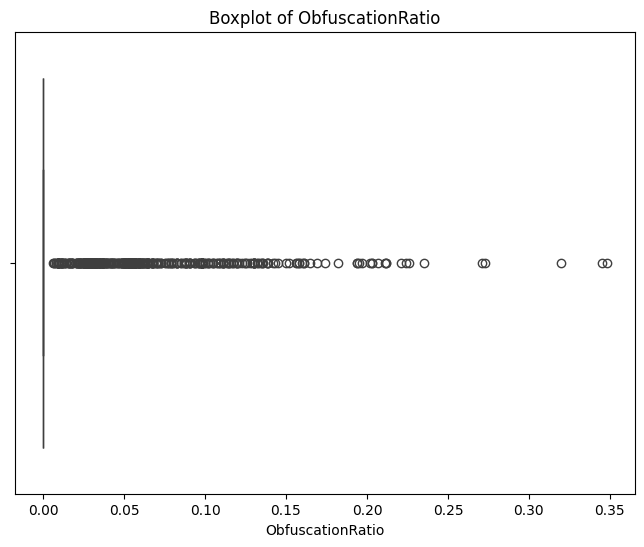

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


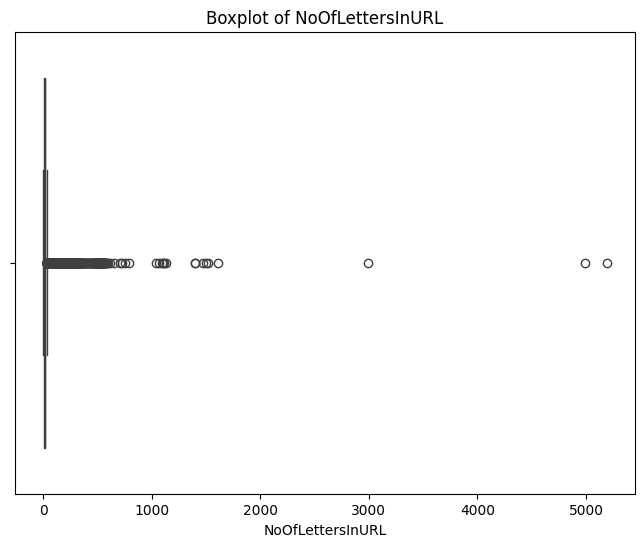

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


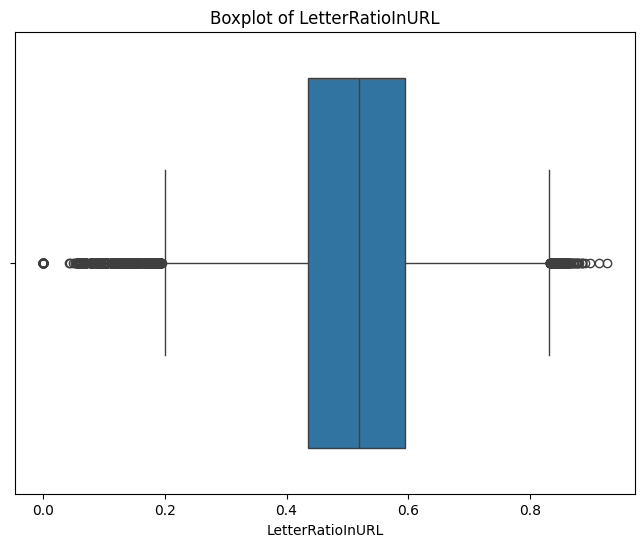

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


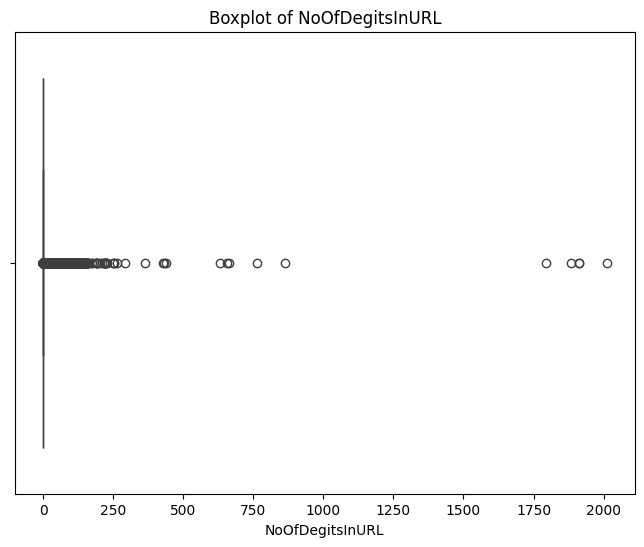

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


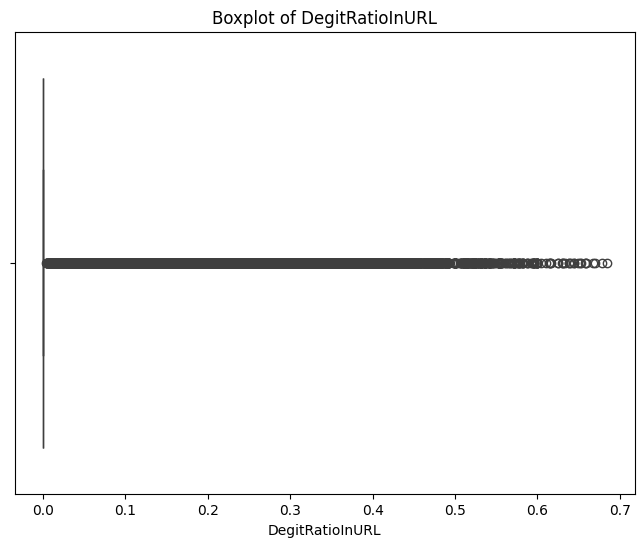

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


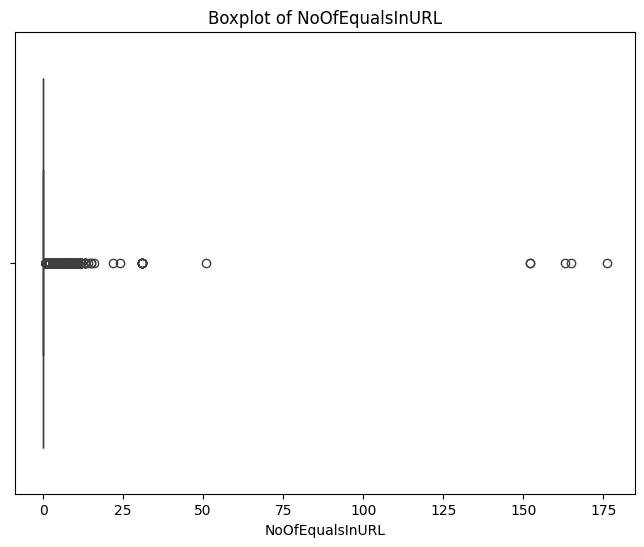

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


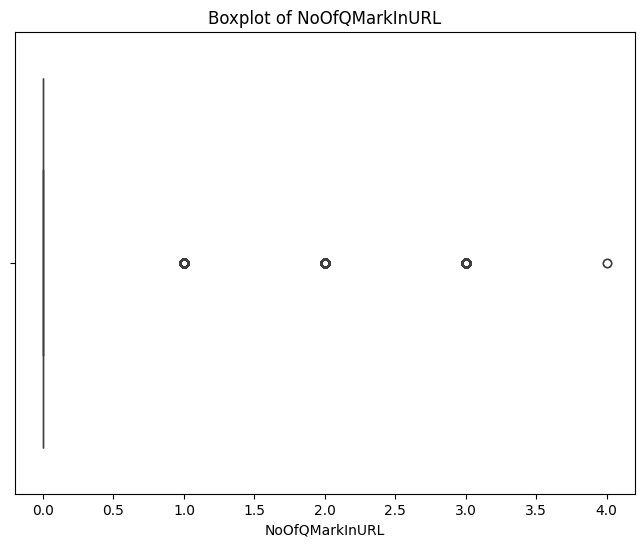

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


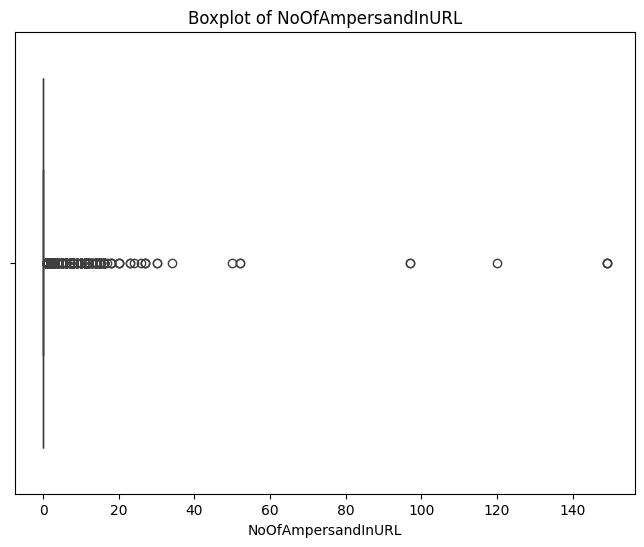

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


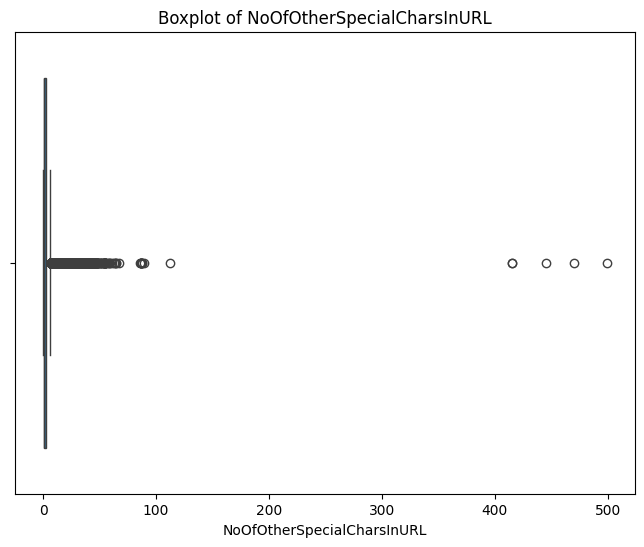

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


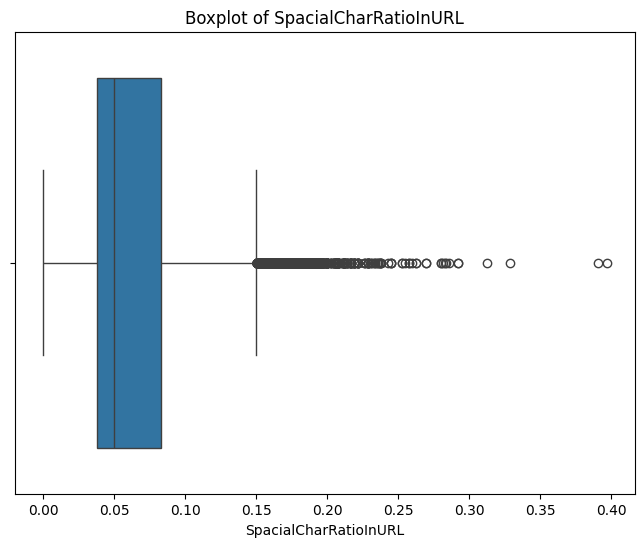

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


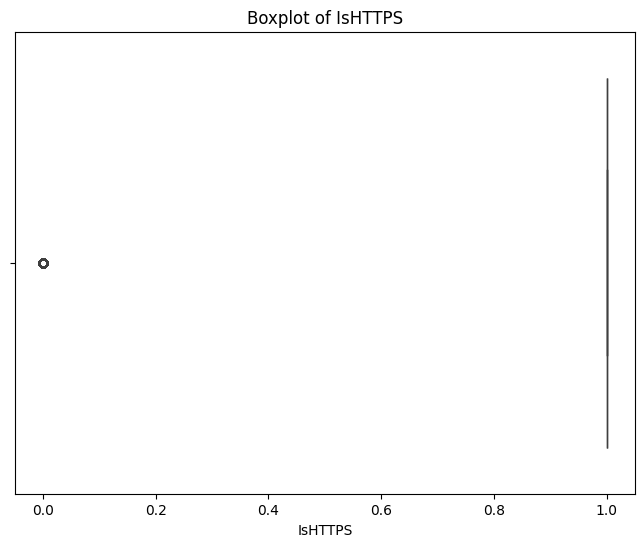

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


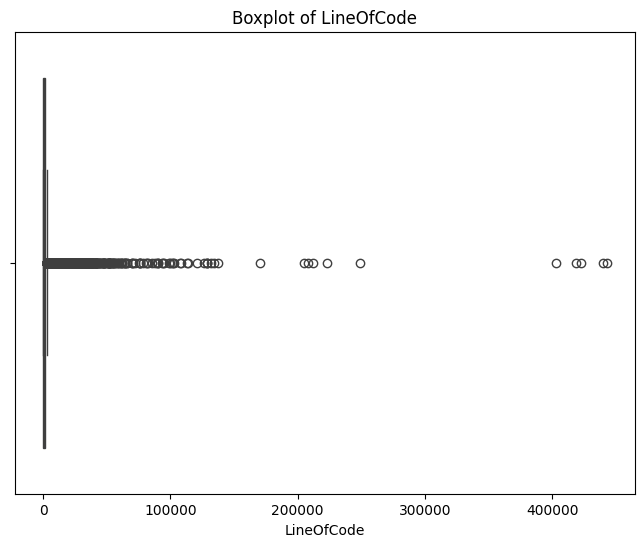

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


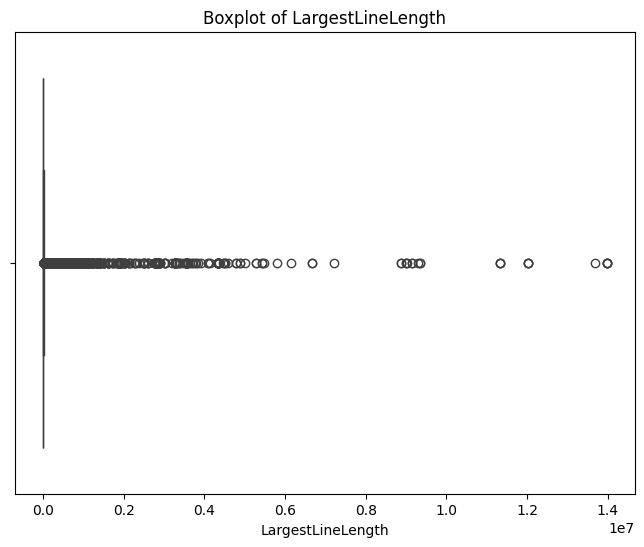

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


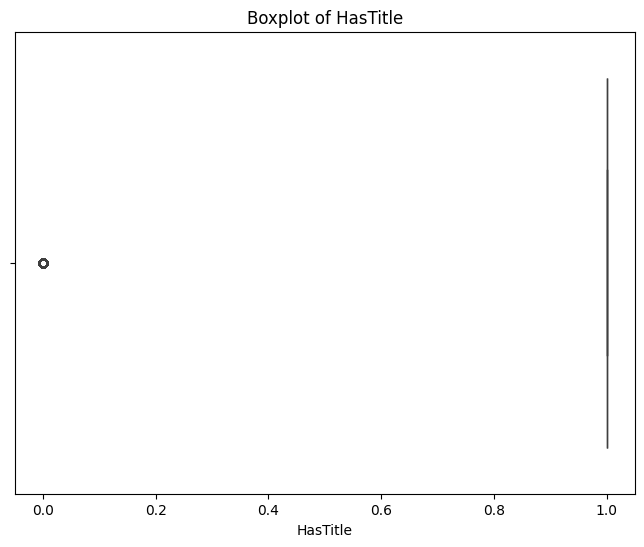

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


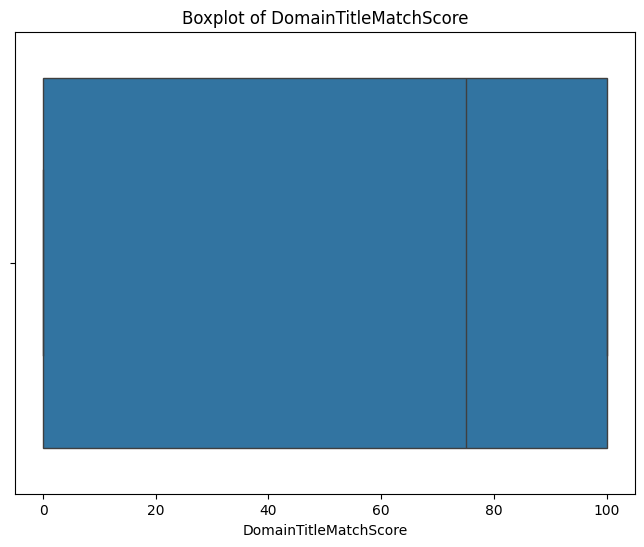

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


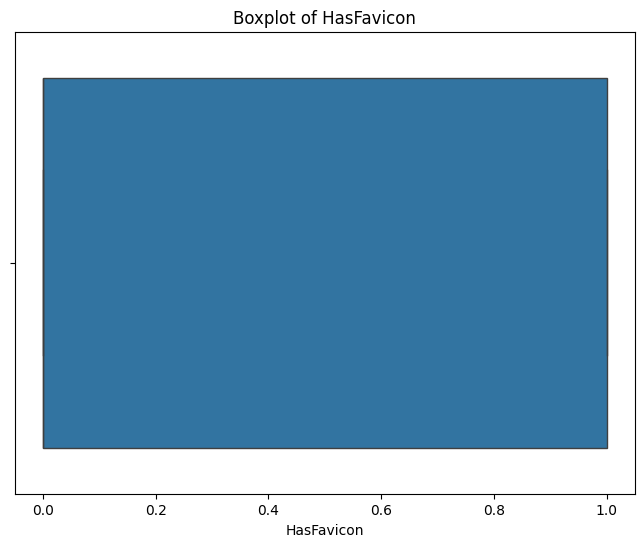

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


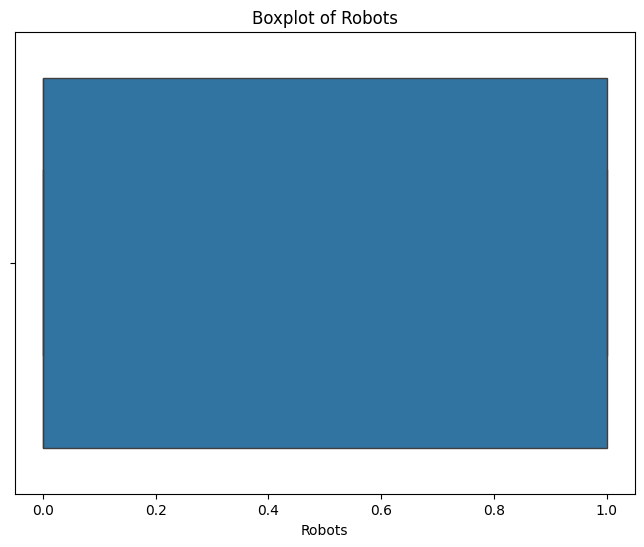

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


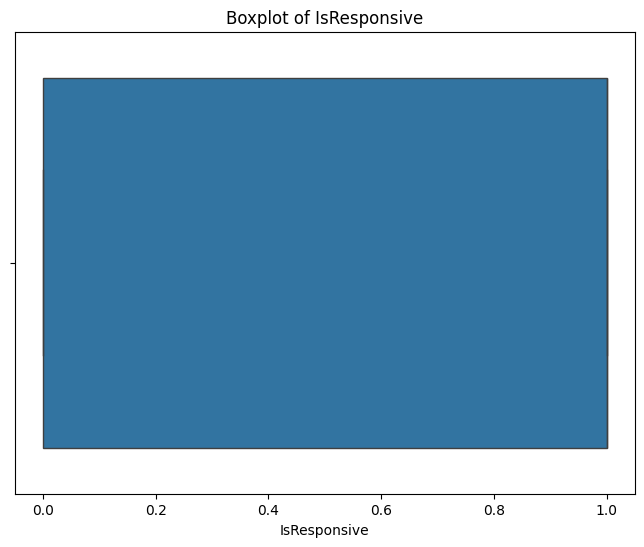

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


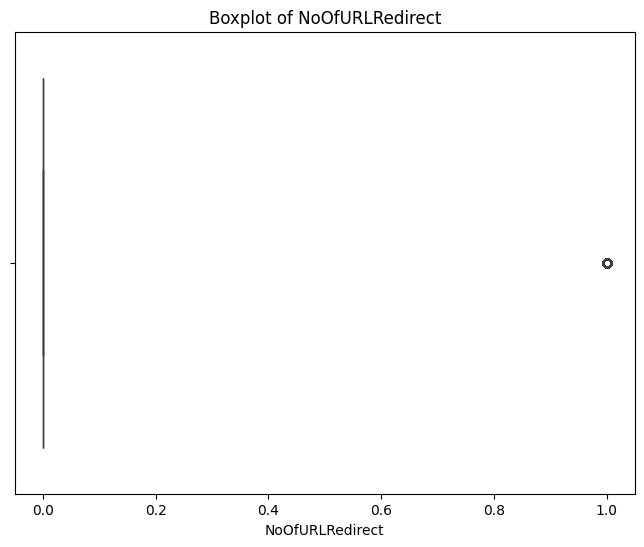

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


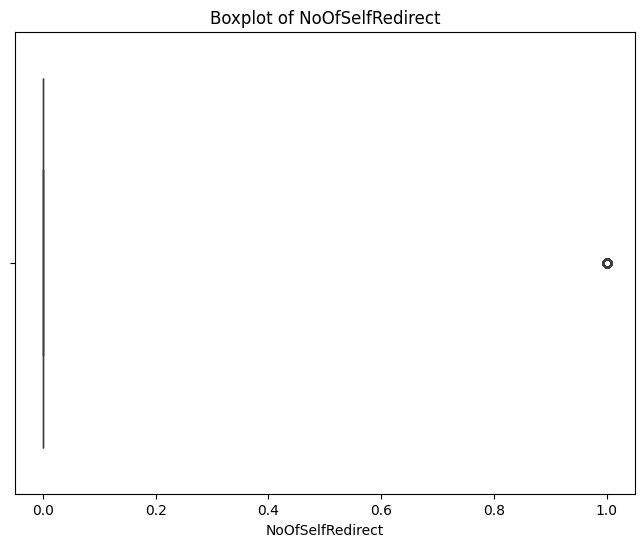

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


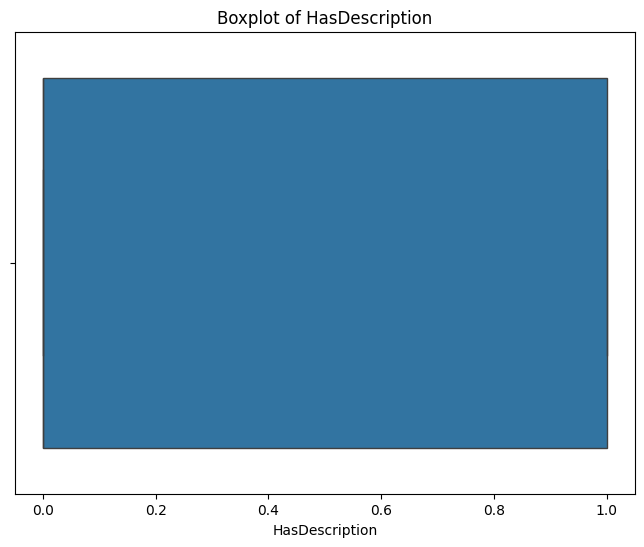

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


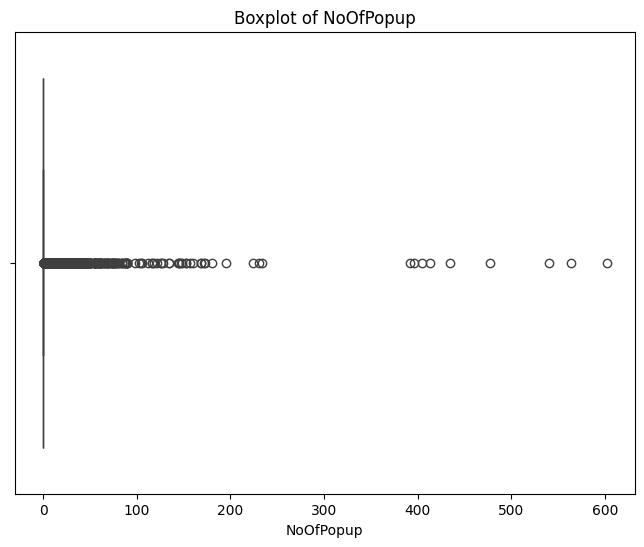

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


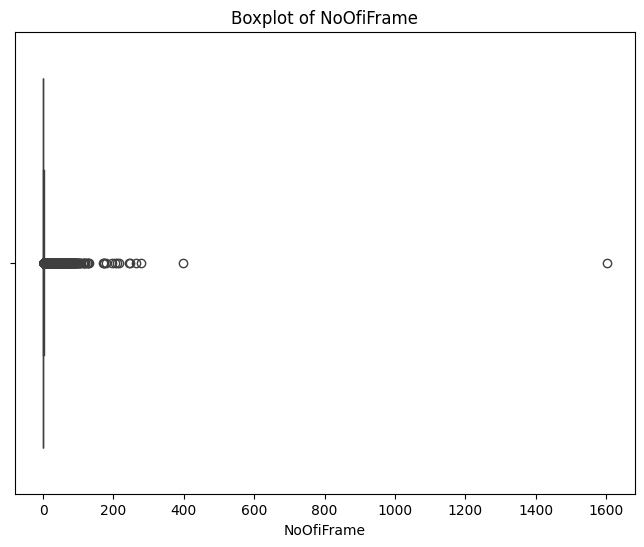

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


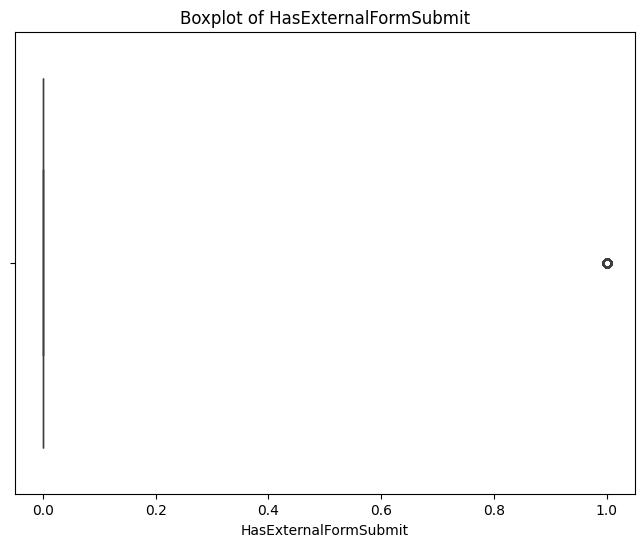

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


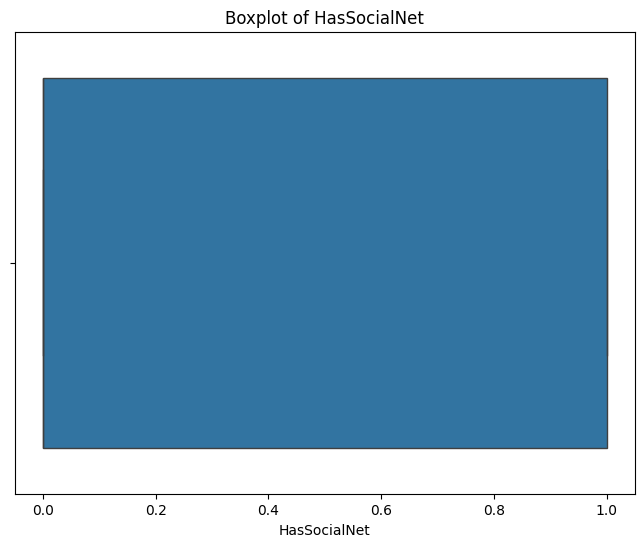

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


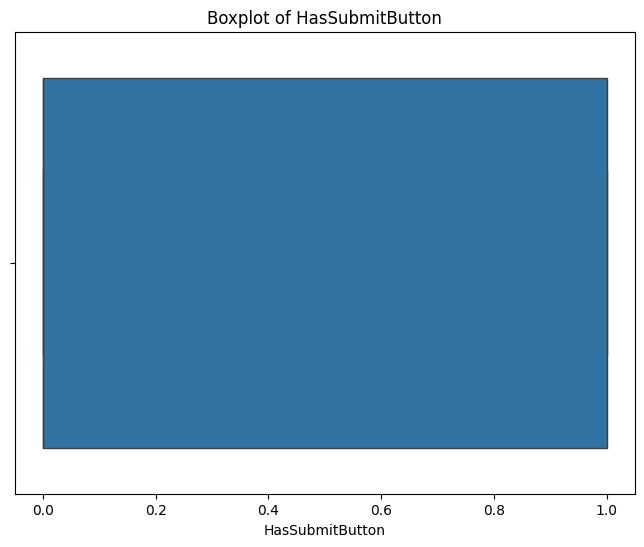

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


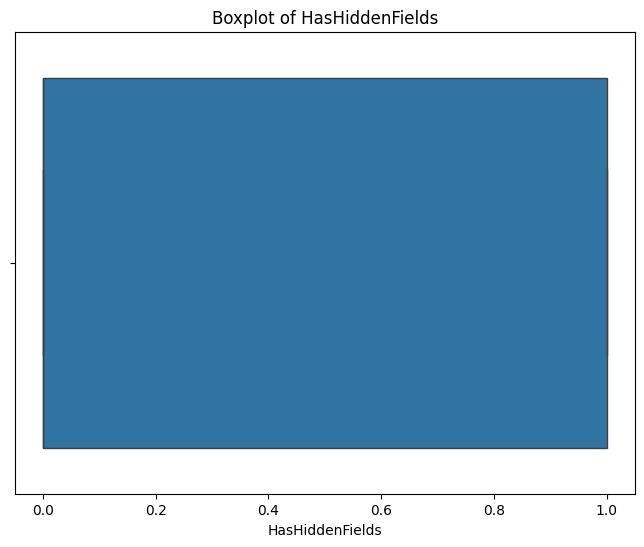

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


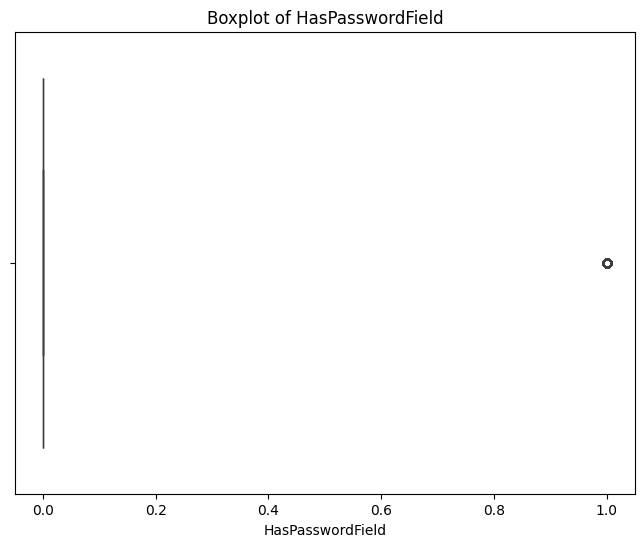

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


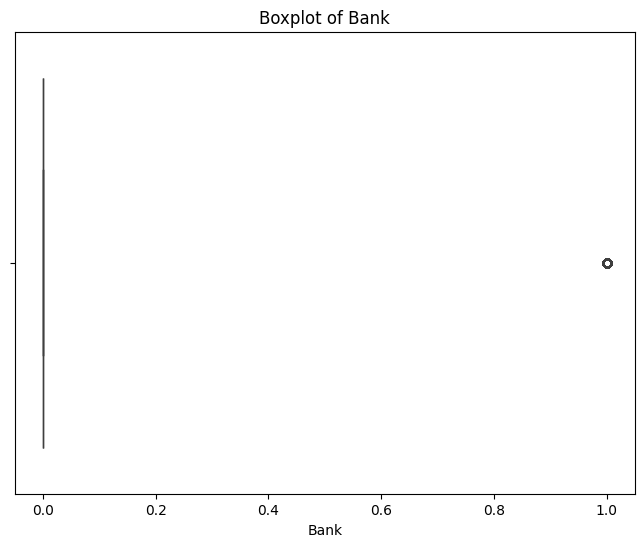

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


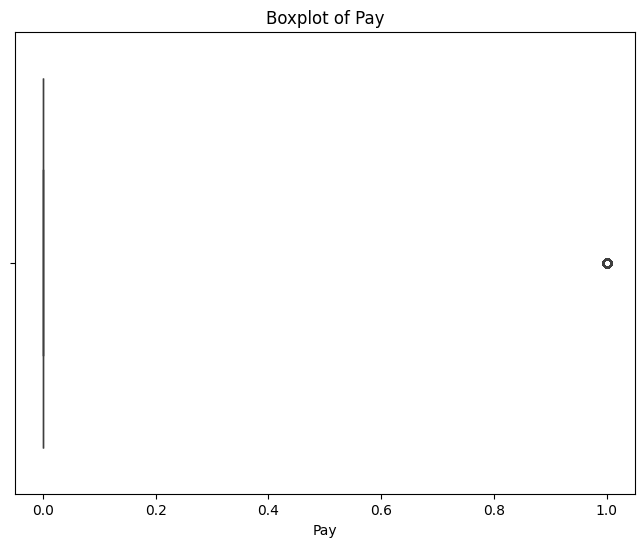

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


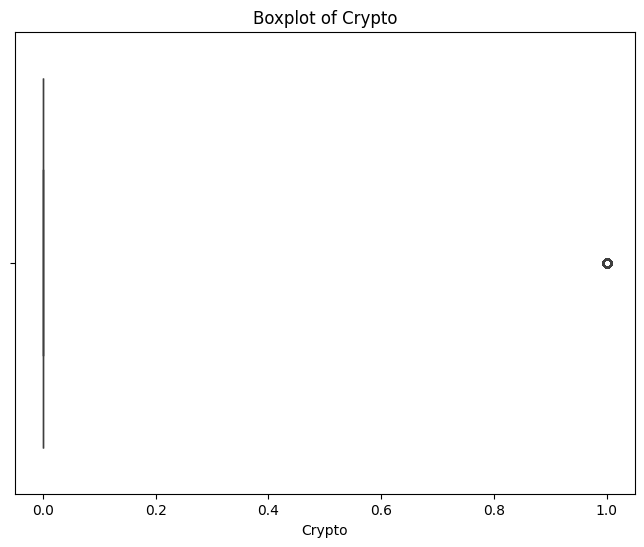

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


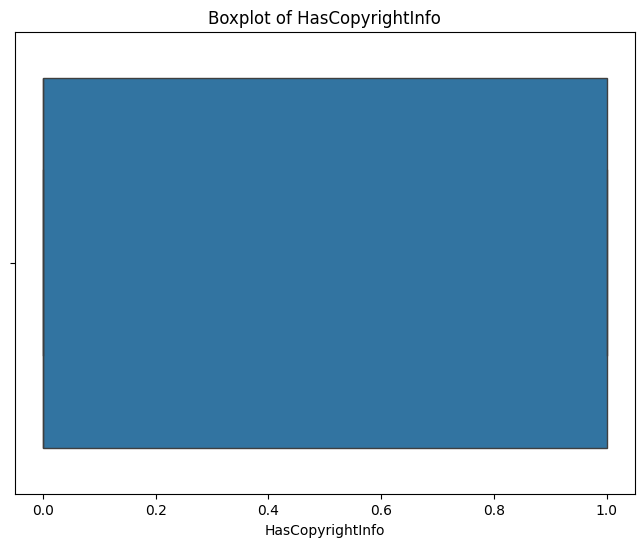

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


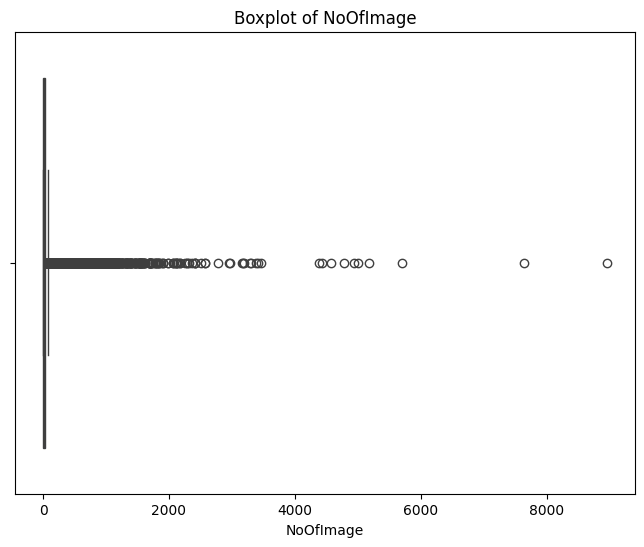

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


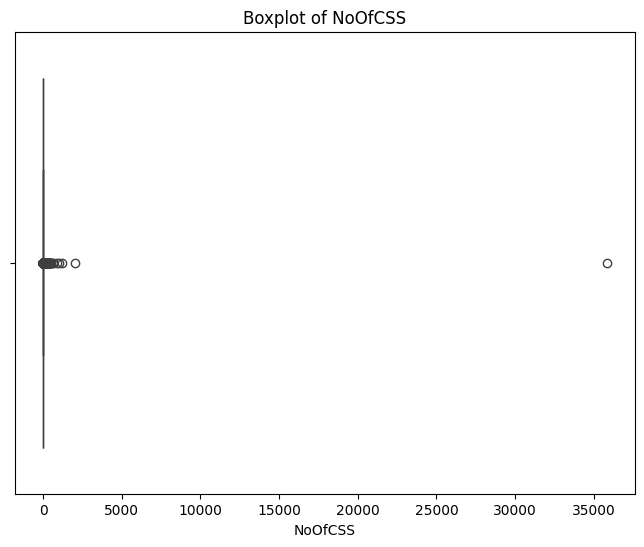

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


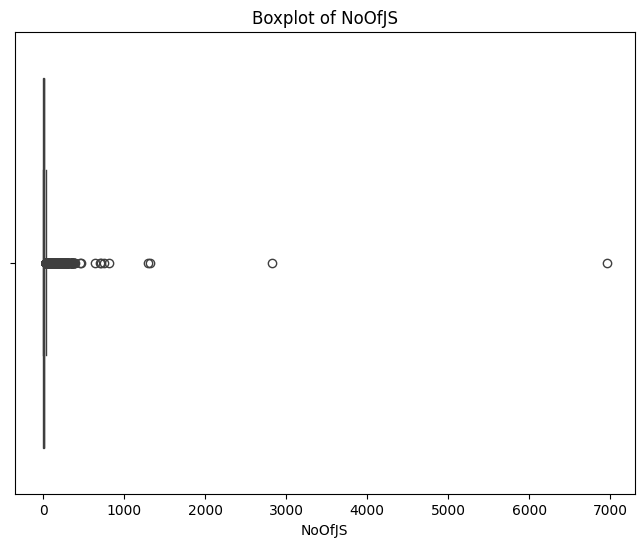

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


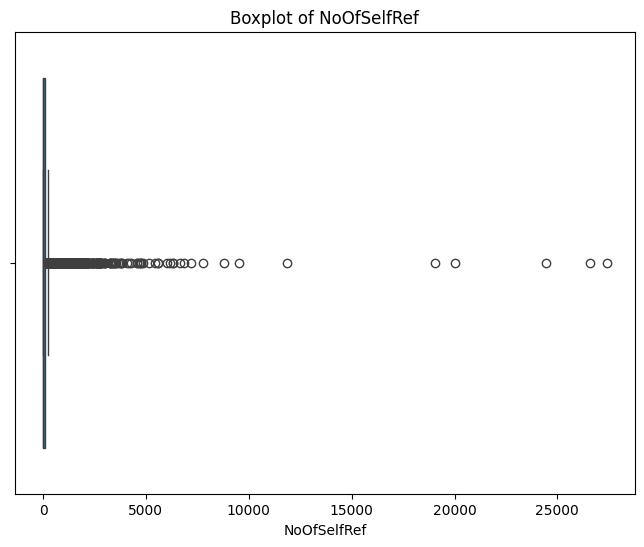

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


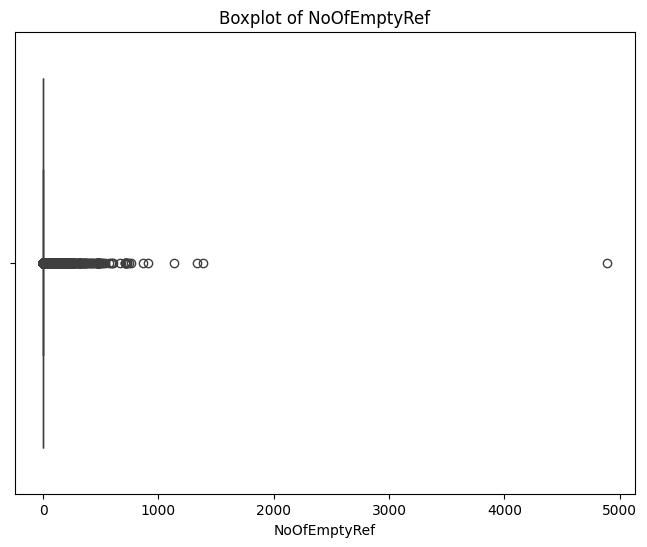

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


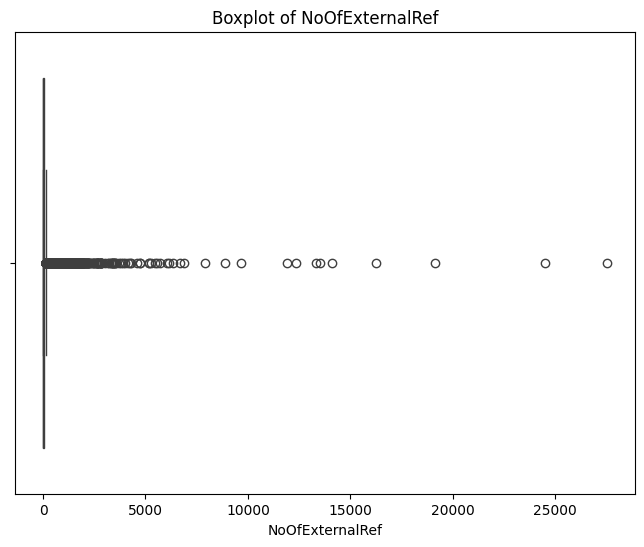

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


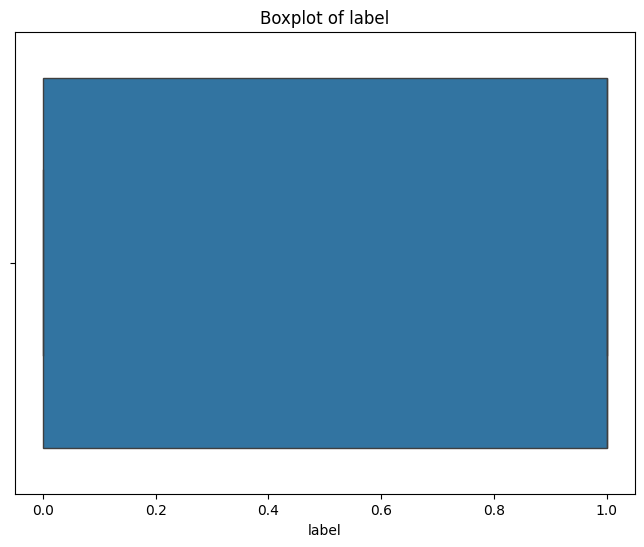

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


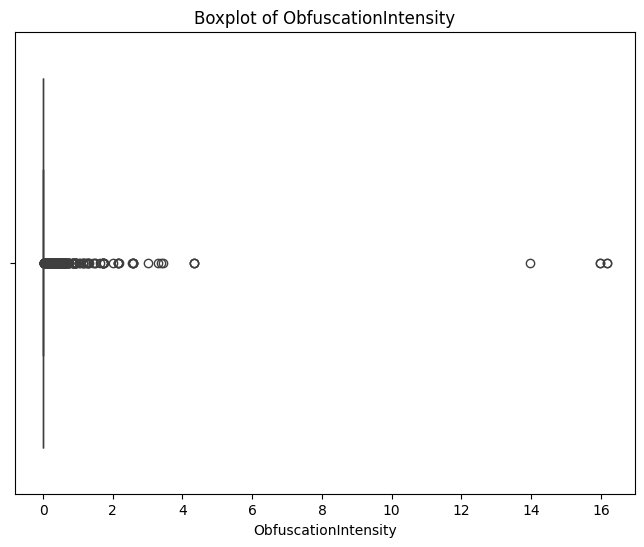

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


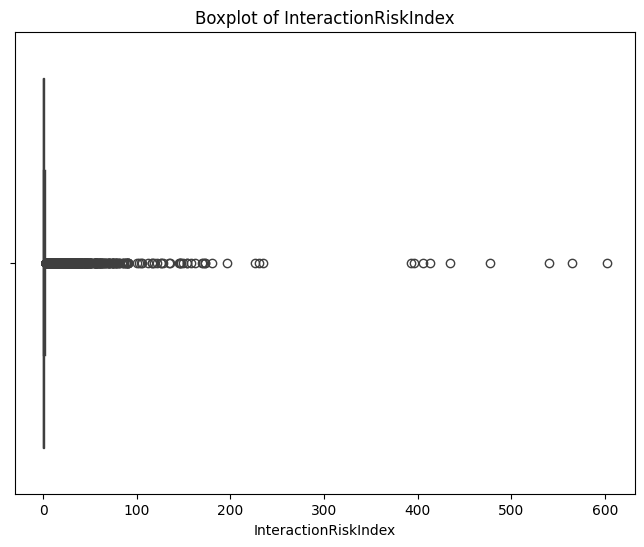

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


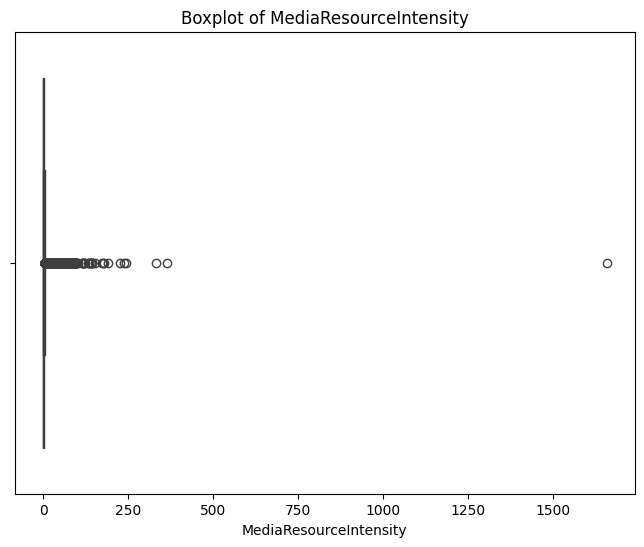

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


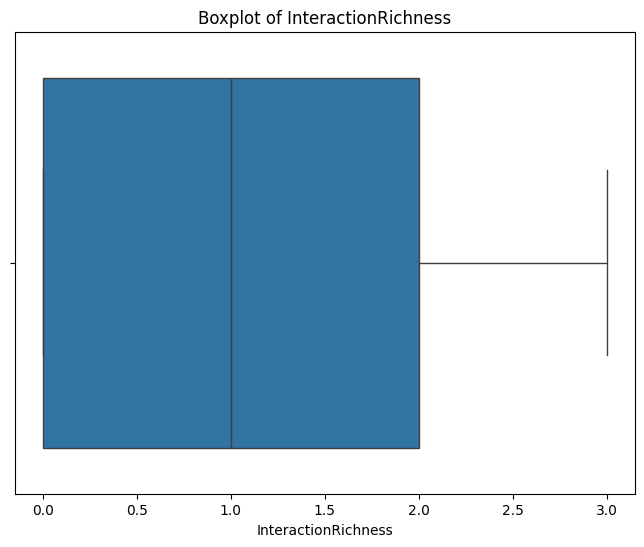

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


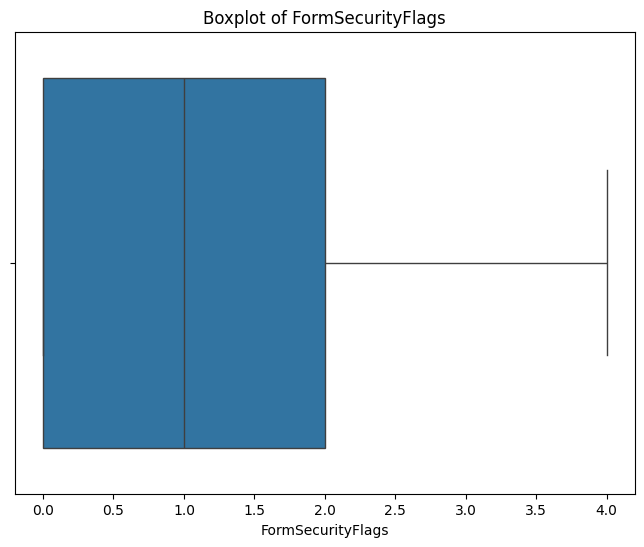

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


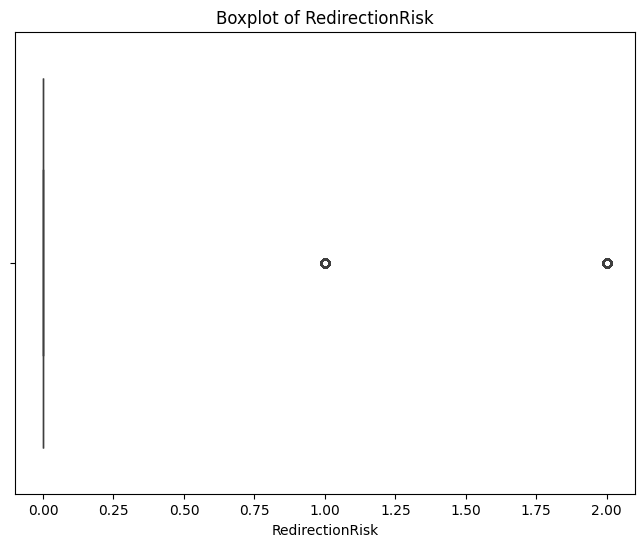

In [35]:
draw_boxplots(df)

### Conclusion on feature engineering 

First, we notice that some plot look quite odd, with square box or no box at all but points located at one or two values. That's normal. That's the case for binary or one hot value (label, bank, redirection risk, etc.)

For the other variables, we check the distribution. 
Some of them have skewed distributions. The median (line in the box) is closer to one side of the box and one whisker is longer than the other. This means that the dataset has more higher (or lower) values. 
This might be an issue for some models which are sensitive to those kind of distributions such as neural networks or linear regression. 
Therefore, we might need to do some adjustments such (transformations, feature binning or scaling)

The concerned variables are : 
- MediaResourceIntensity 
- InteractionRiskIndex 
- LineOfCode 
- ObfuscationIntensity
- NoOfExternalRef
- SpacialCharRatioInURL
- NoOfOtherSpecialCharsInURL
- NoOfAmpersandInURL
- NoOfEqualsInURL
- NoOfDegitsInURL
- NoOfLettersInURL
- NoOfObfuscatedChar
- URLLength
- NoOfPopup
- NoOfiFrame
- NoOfImage
- NoOfCSS
- NoOfJS
- NoOfSelfRef
- NoOfEmptyRef

Another issue would be the outliers, id est the points outside the whiskers. 
They either mean a natural variability or an anomaly. If they are frequent or extreme, it means we have to do a bit of cleaning in the dataset by removing, capping or transforming them. 

The concerned variables are : 
- DomainTitleMatchScore
- SpacialCharRatioInURL

# Histograms 

Still, to see the distribution of each numerical variables, we can use histograms.

In [36]:
""" TIPS 
bins := ranges into which data values are grouped 

50-100 bins = an overview with some detail
400-500 bins = a more granular view, particularly useful if the data has many unique values or a complex distribution
around 100 bins = a balance, providing enough detail for most exploratory data analyses on large datasets without overwhelming the visualization
"""

def draw_histograms(df, bins=100):
    
    for column in df.columns:
        if ptypes.is_numeric_dtype(df[column]):
            plt.figure(figsize=(8, 6))
            sns.histplot(df[column], bins=bins, kde=True)
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

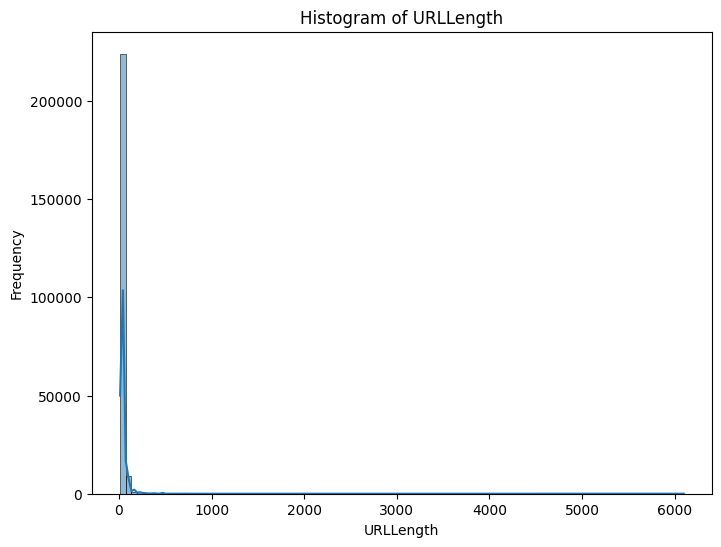

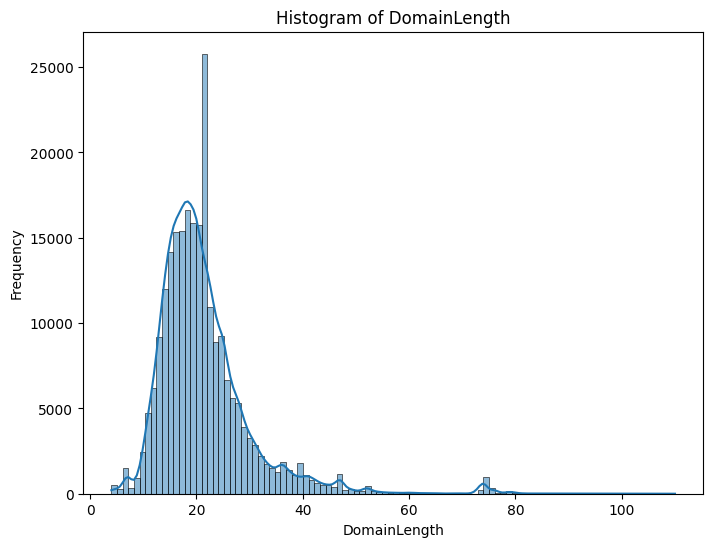

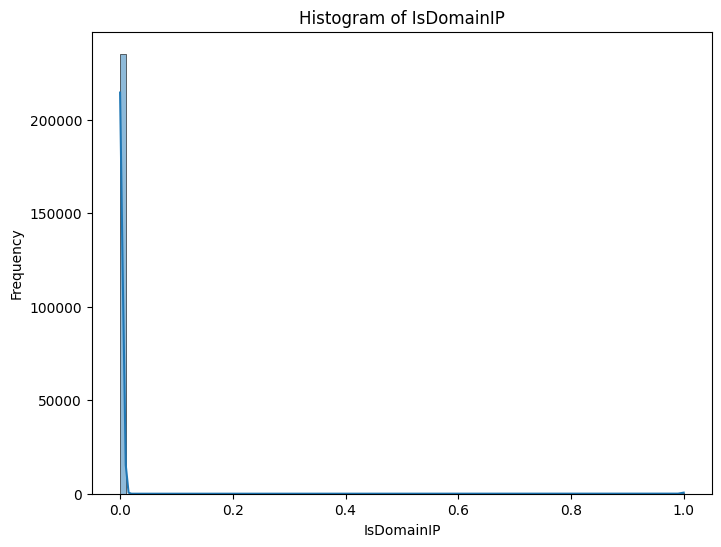

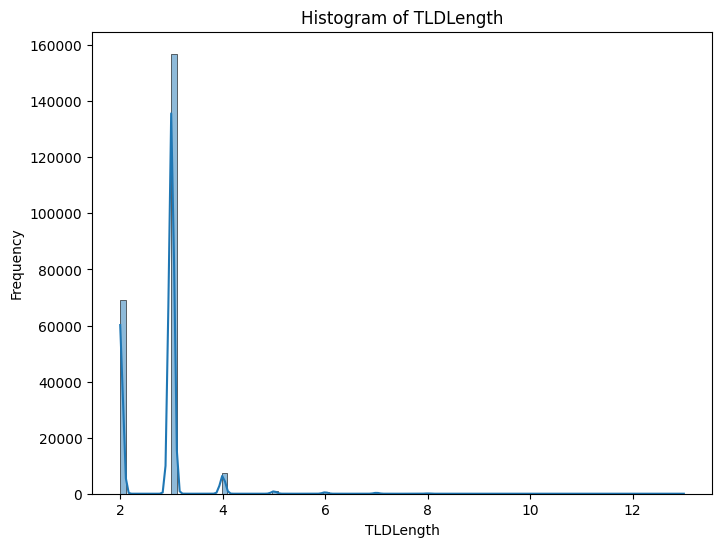

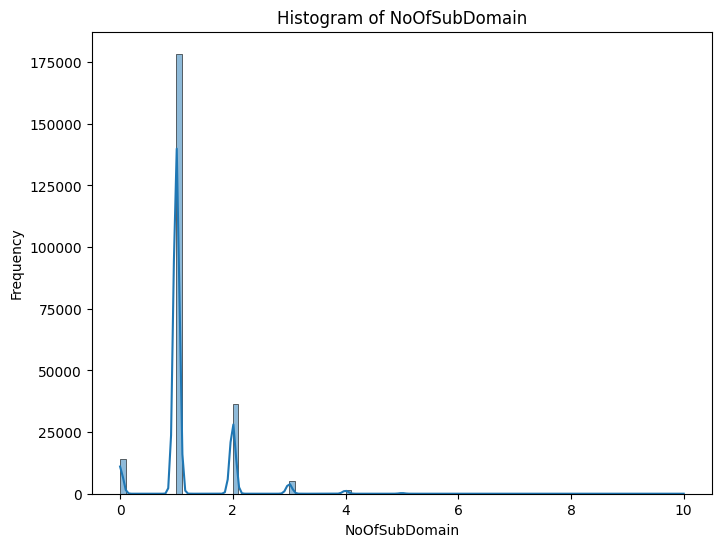

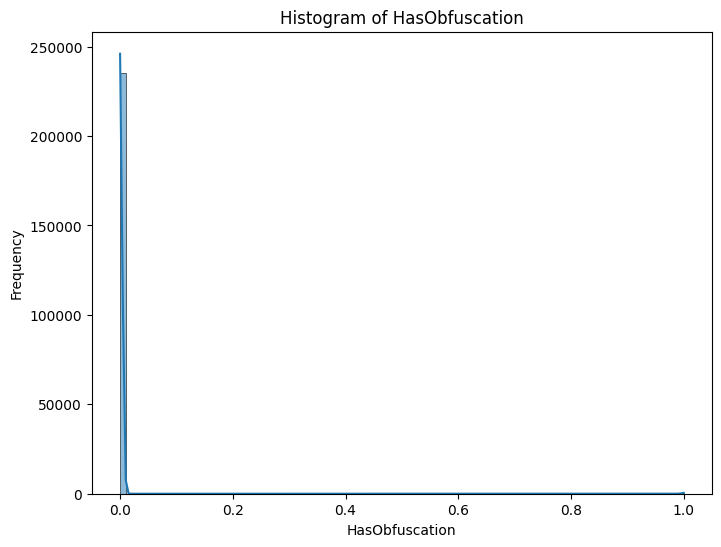

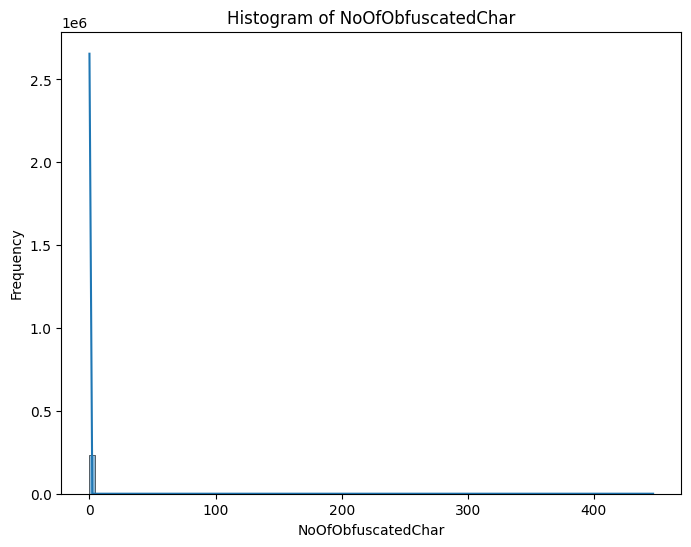

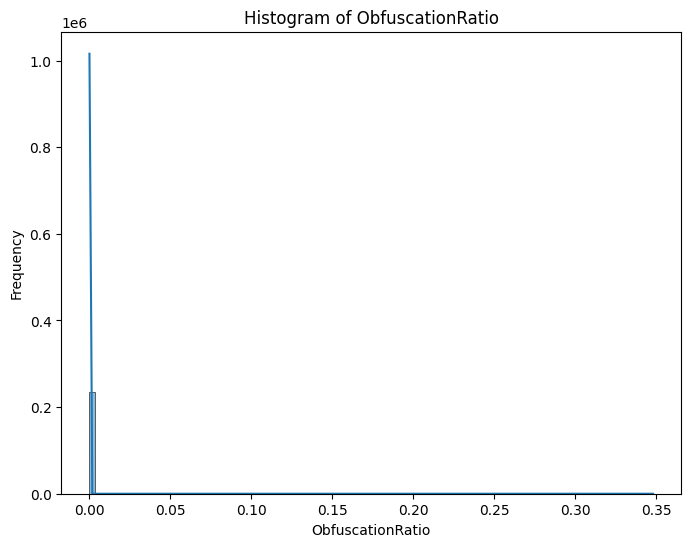

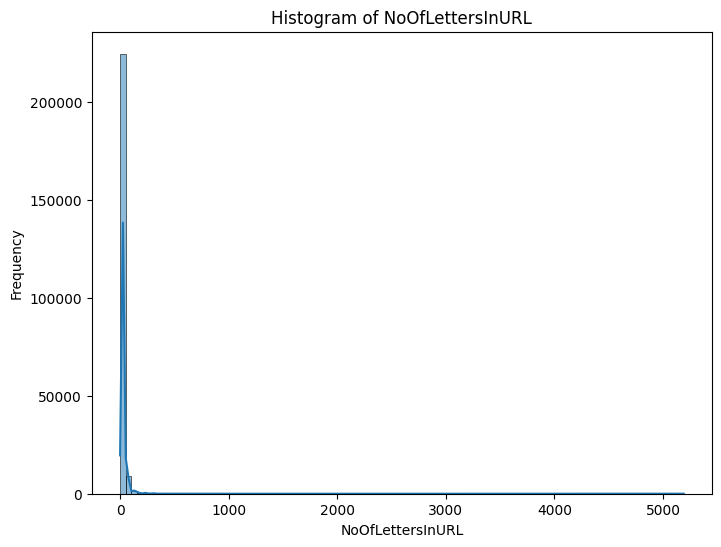

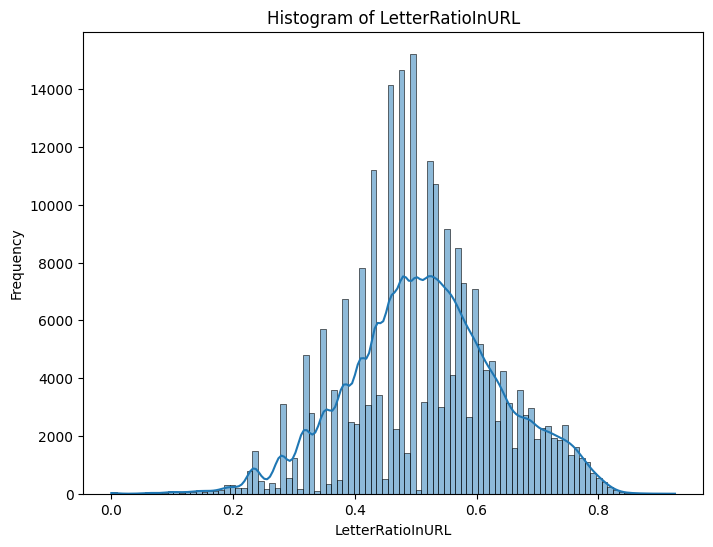

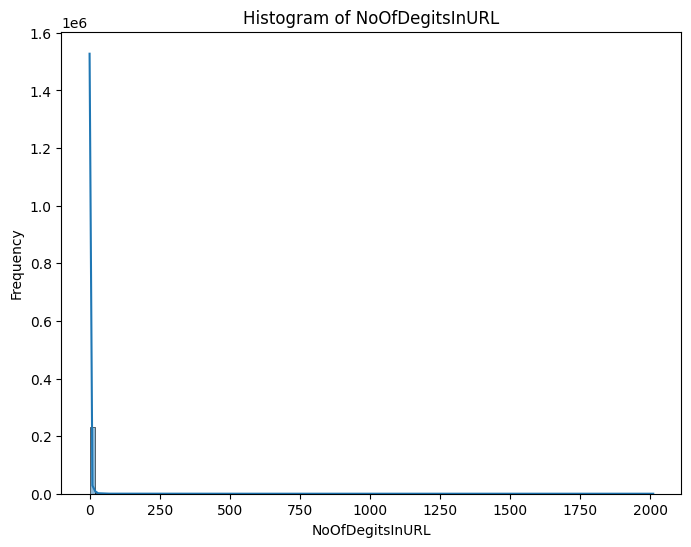

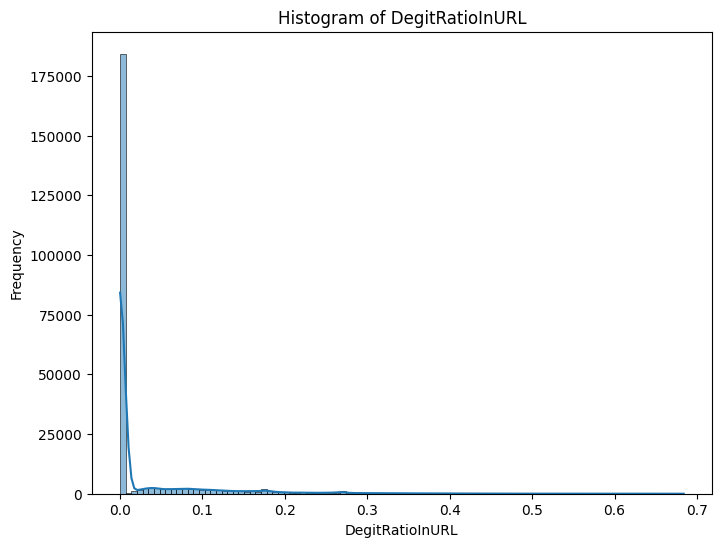

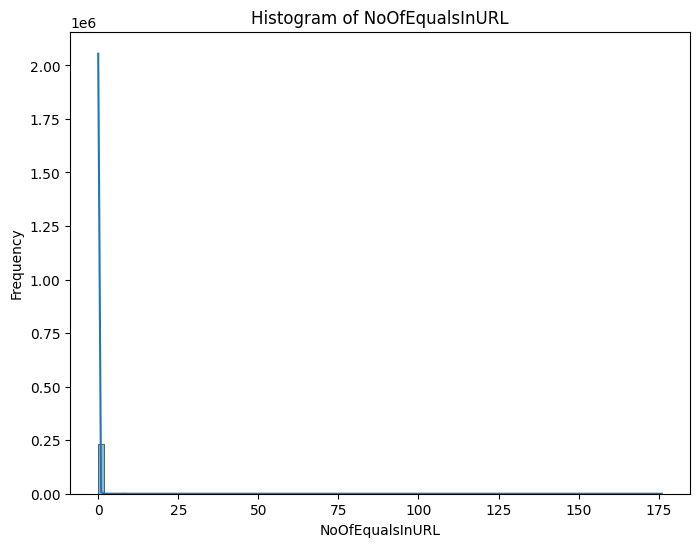

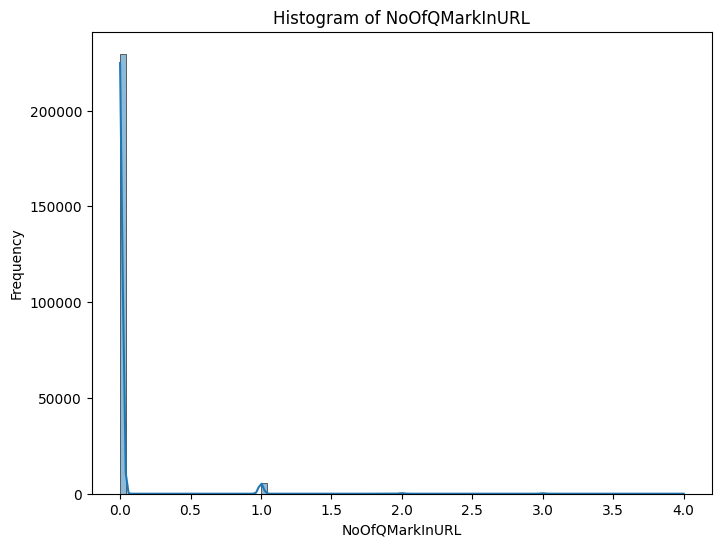

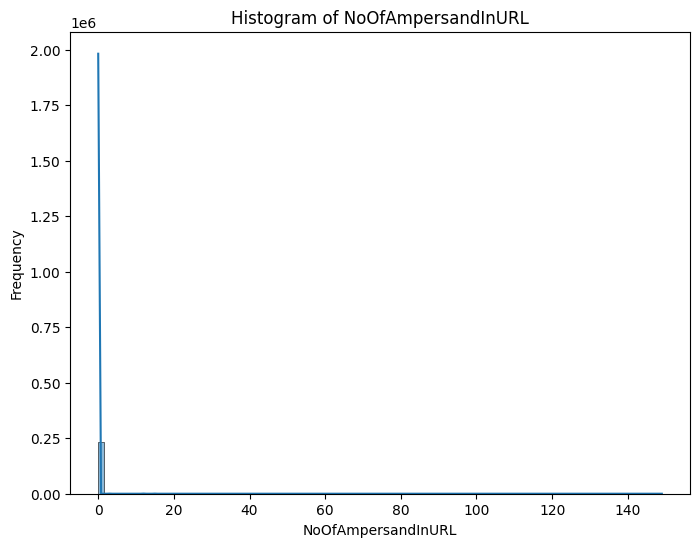

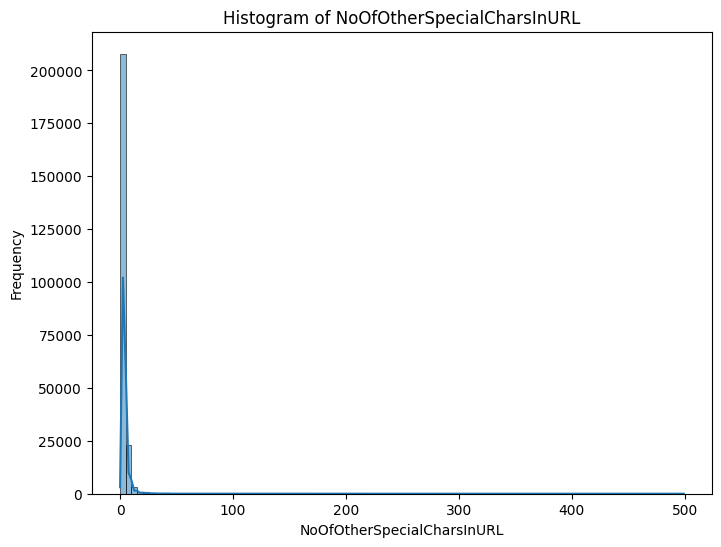

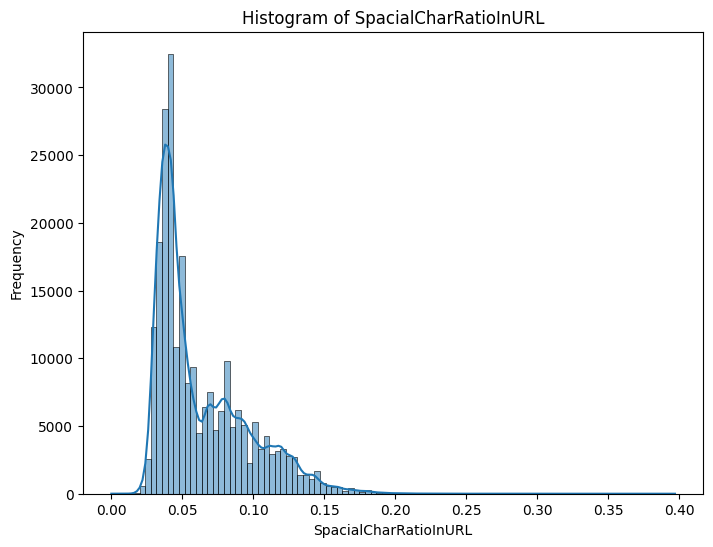

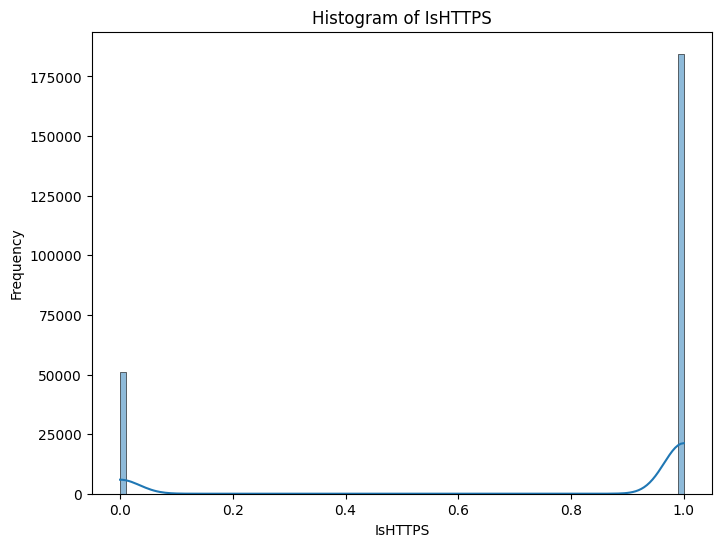

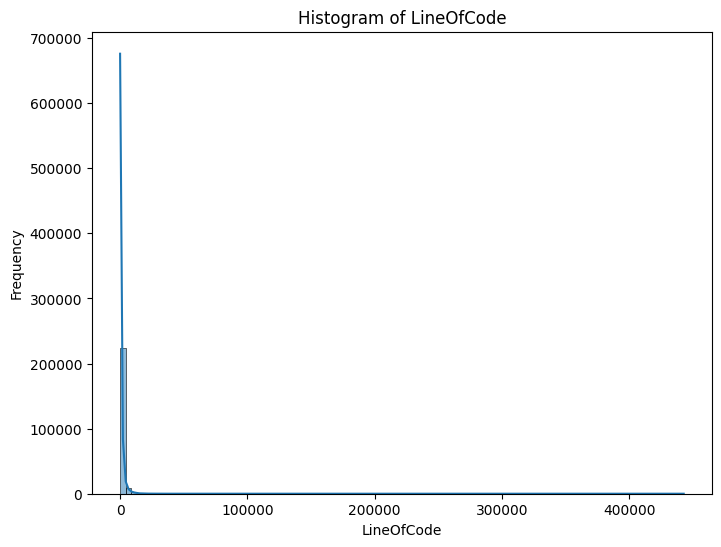

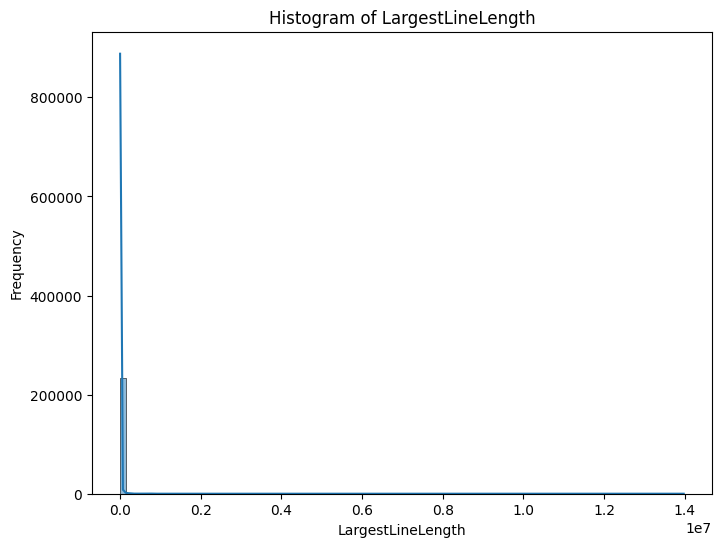

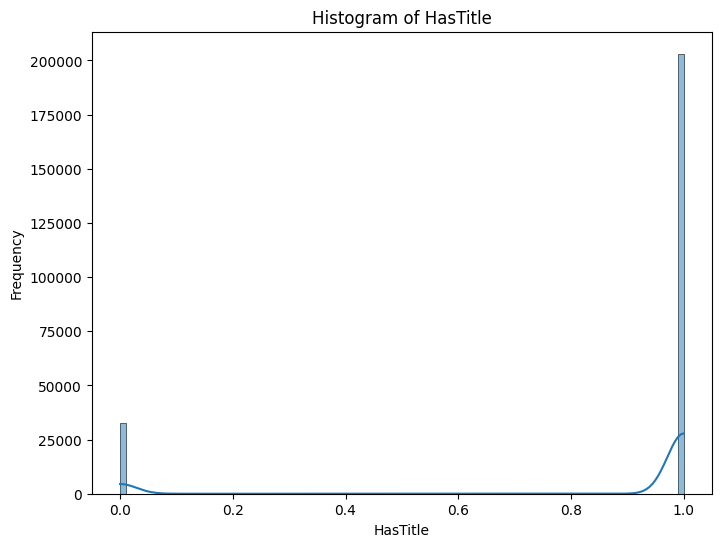

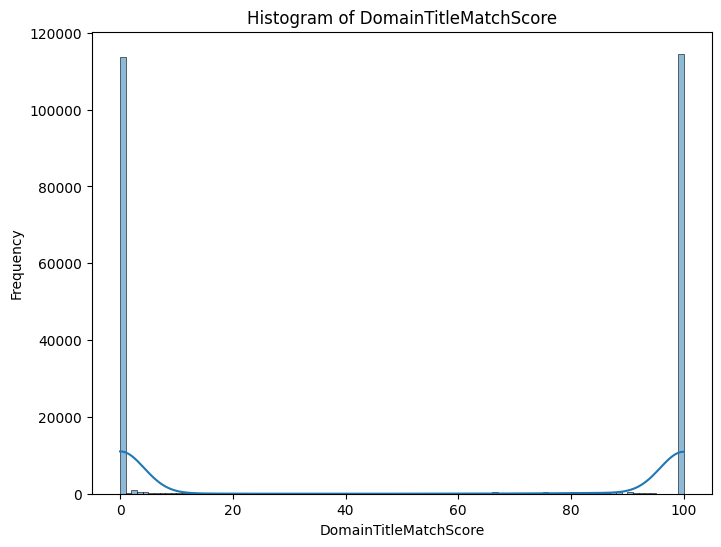

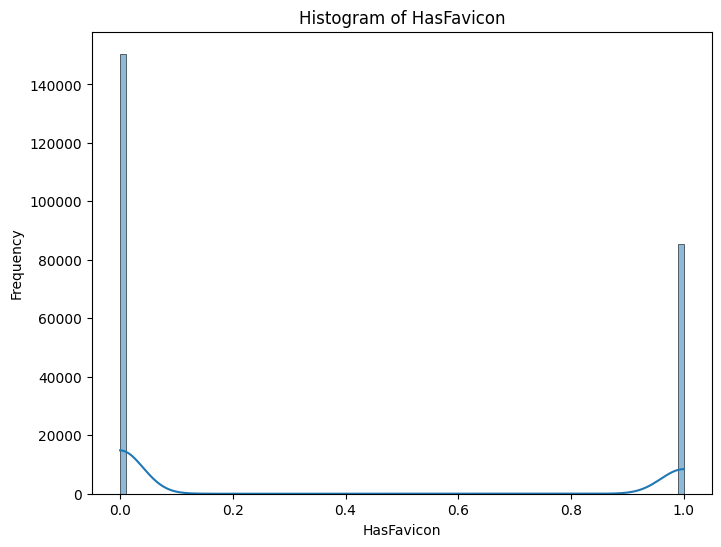

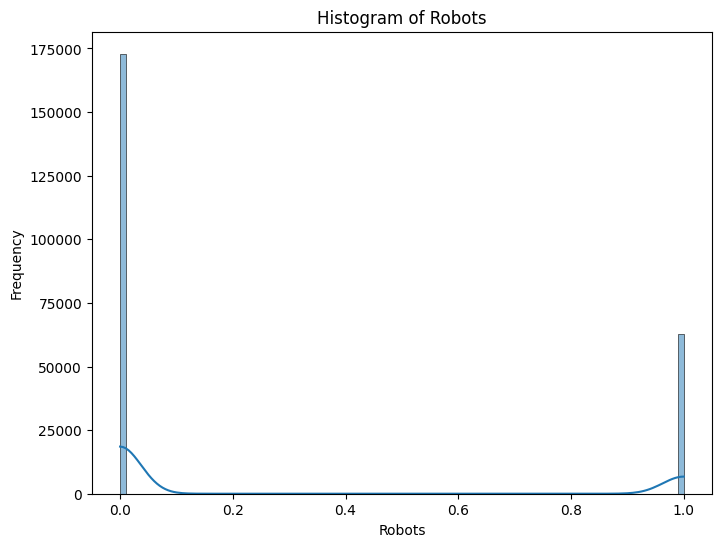

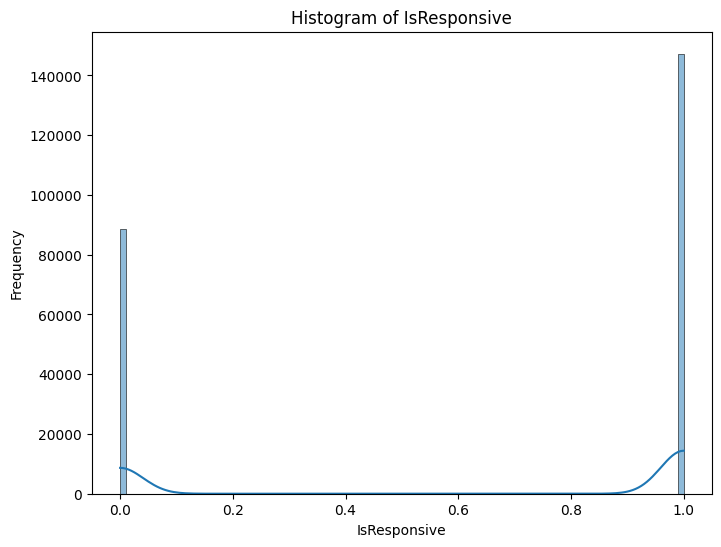

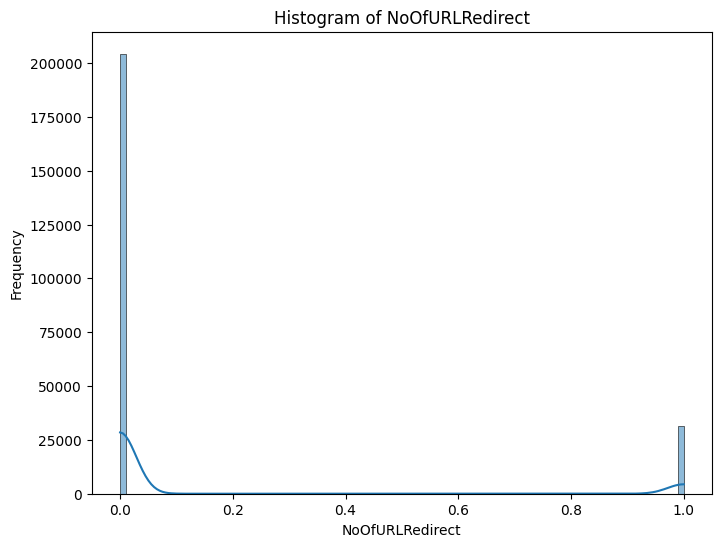

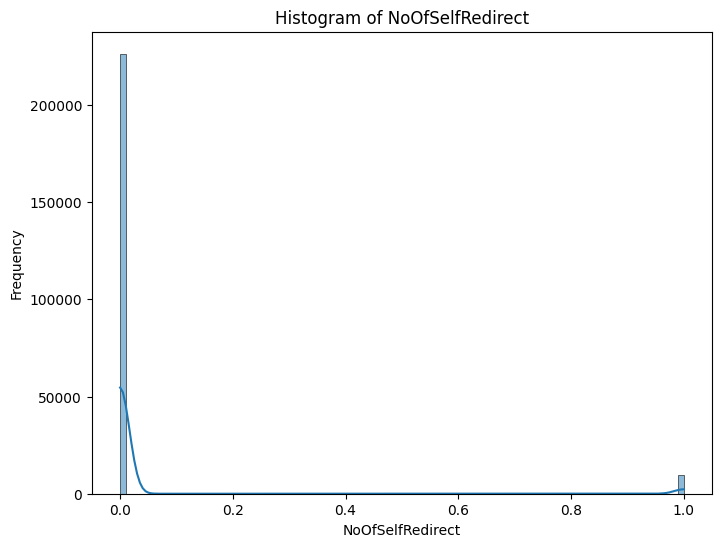

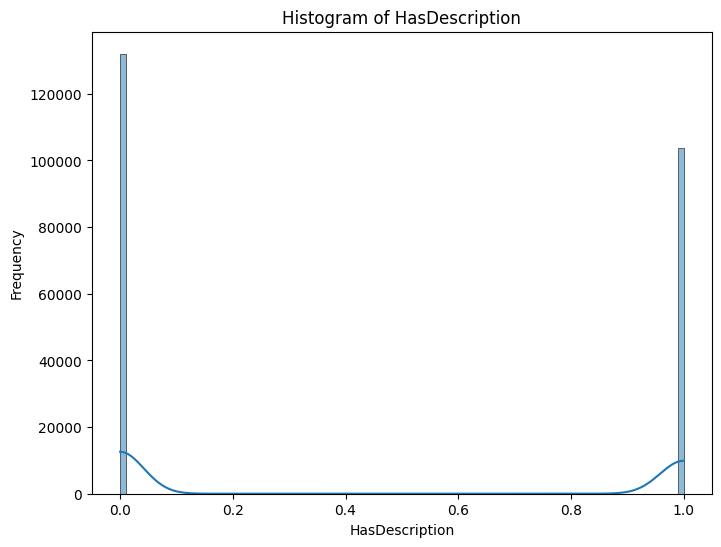

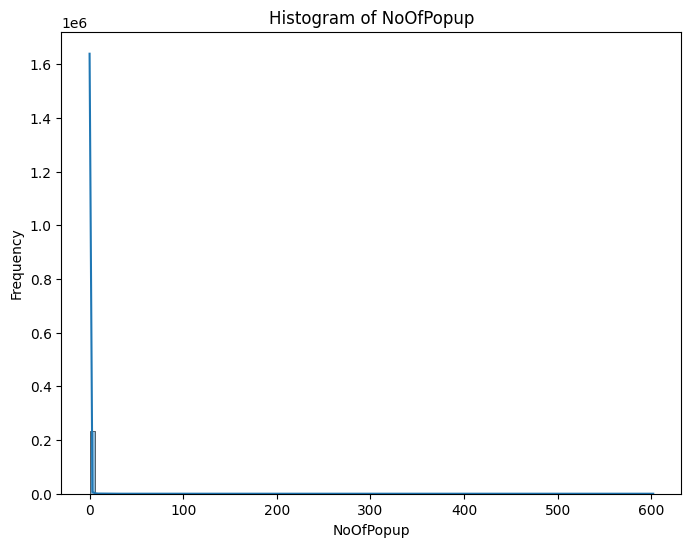

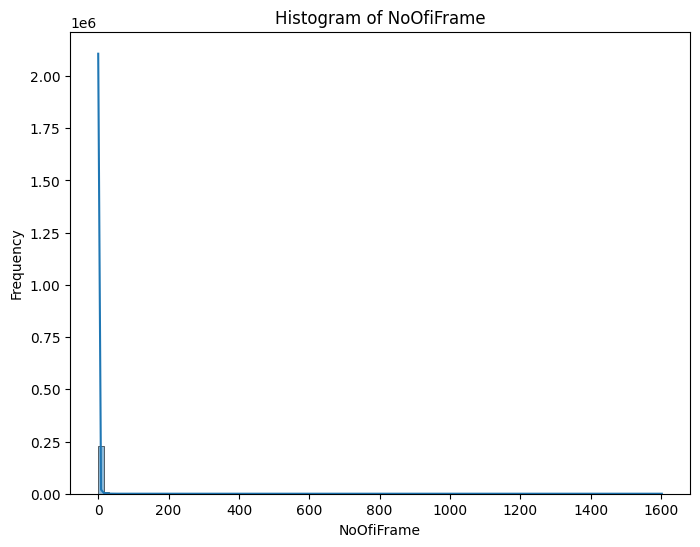

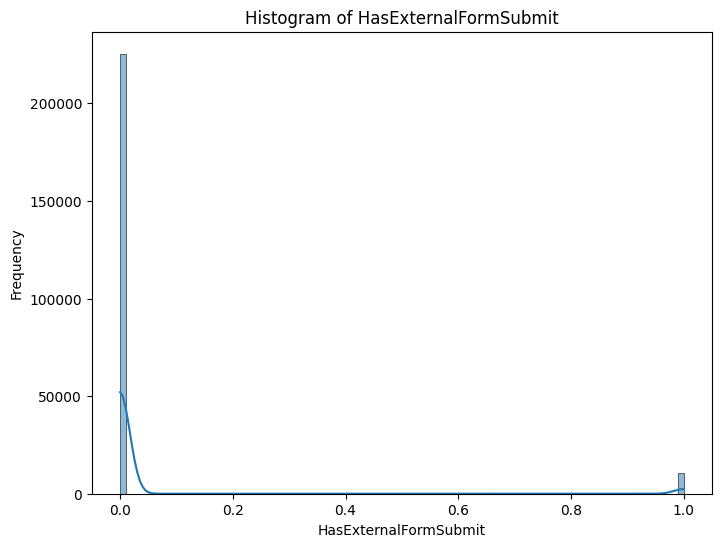

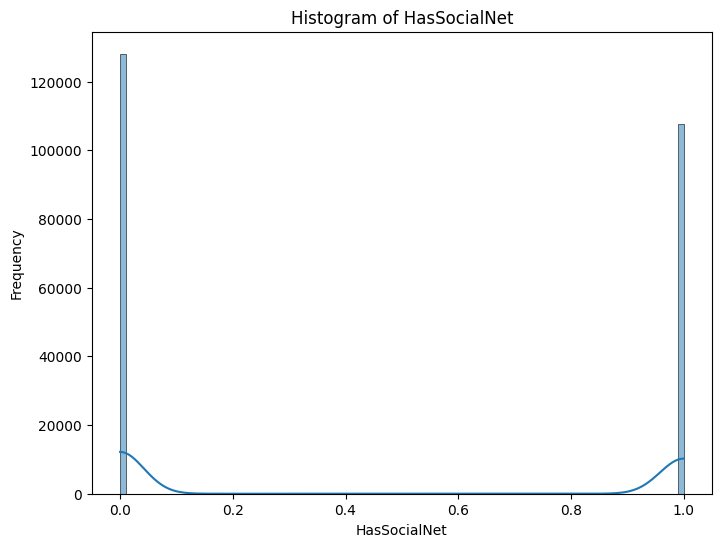

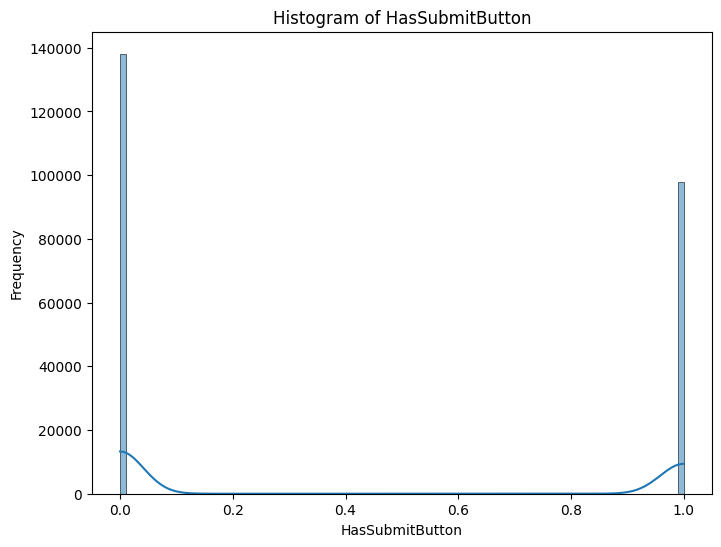

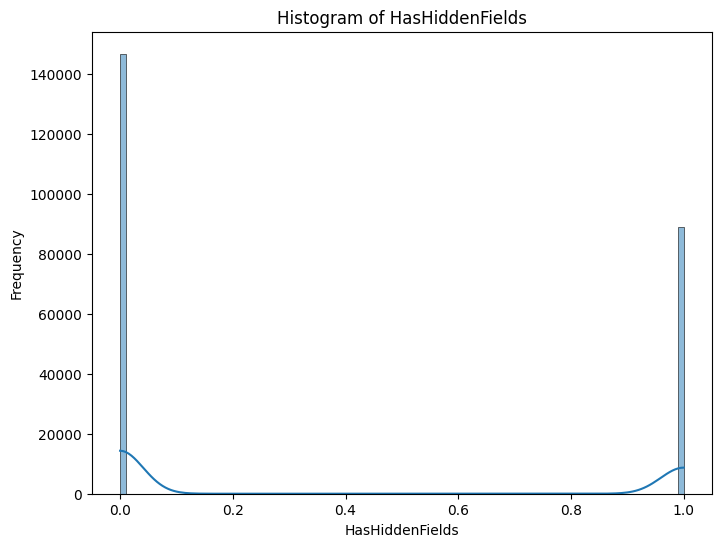

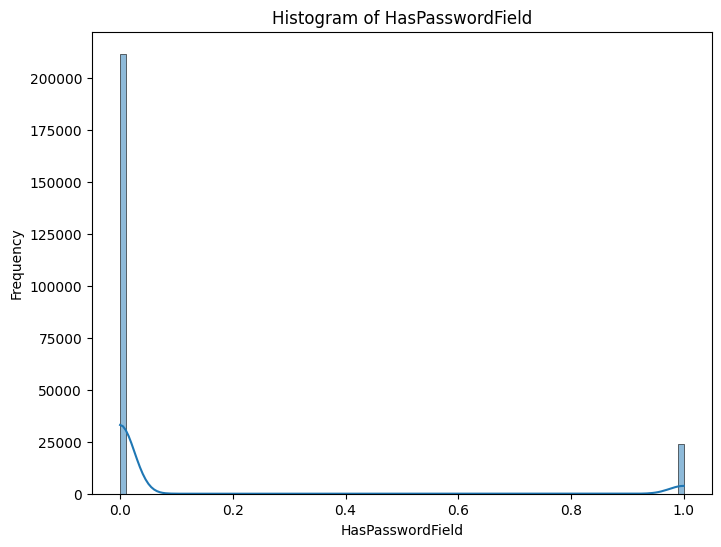

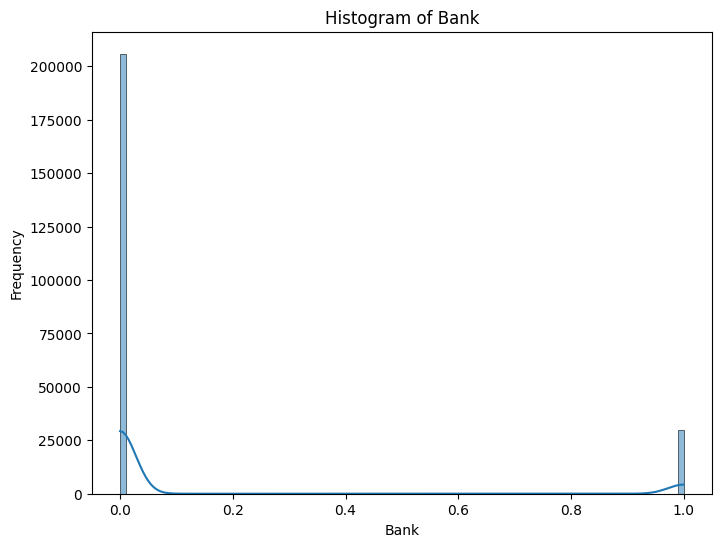

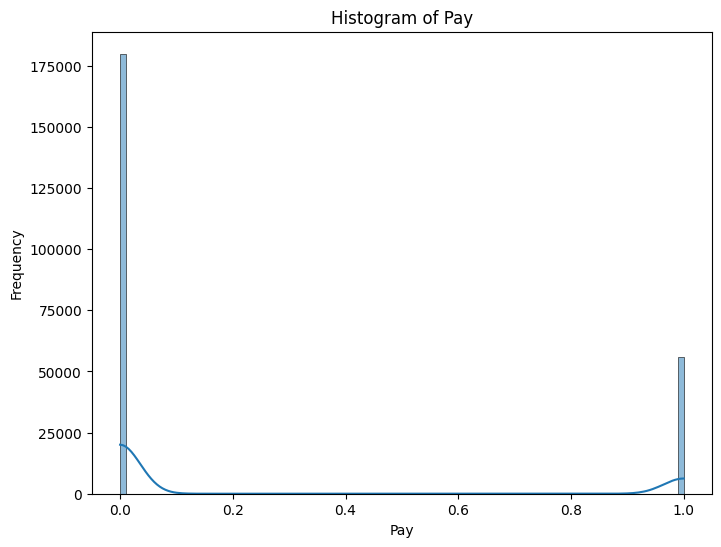

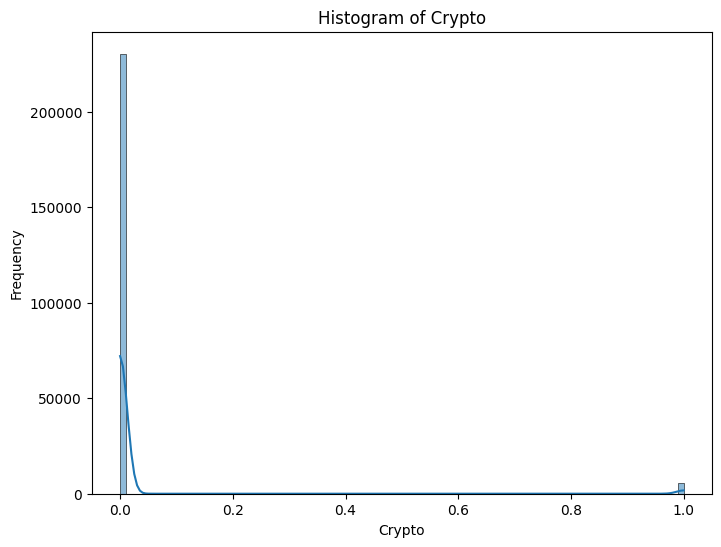

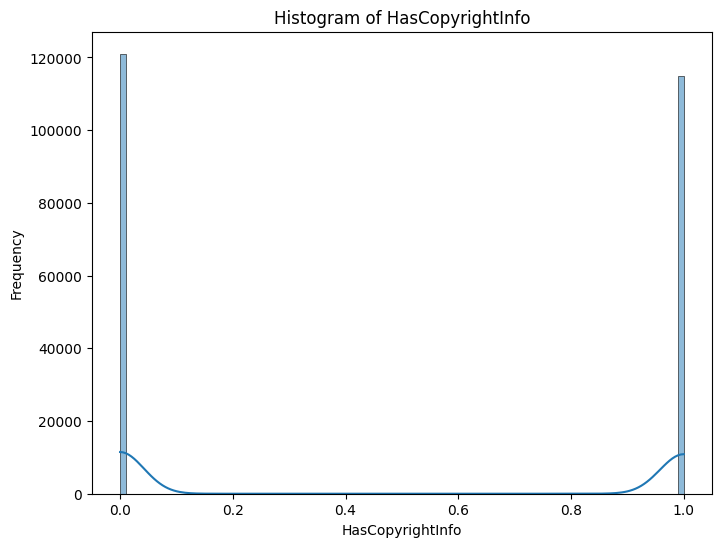

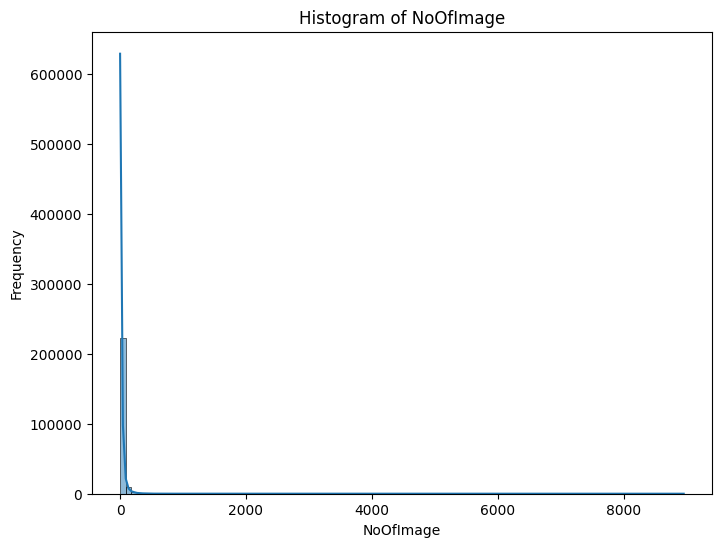

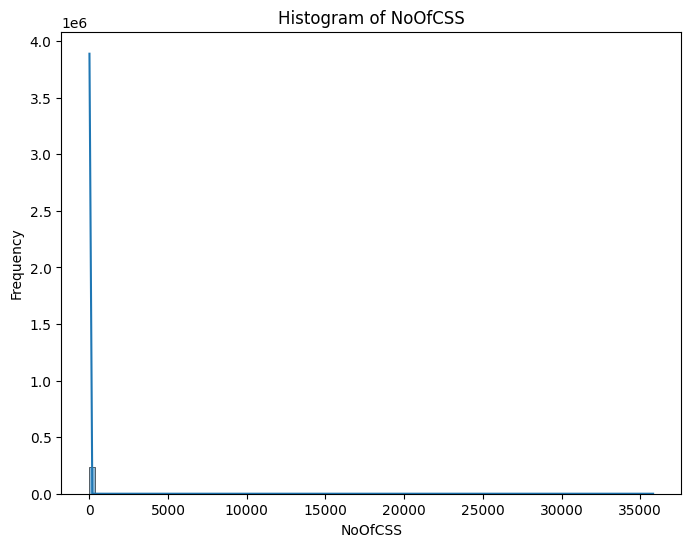

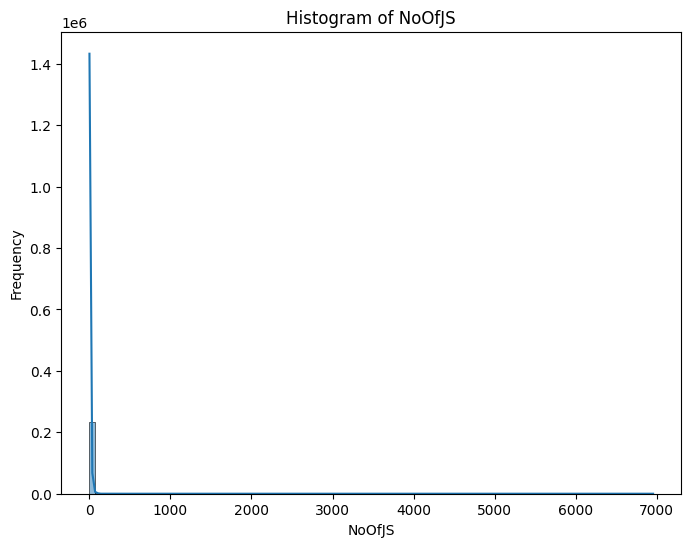

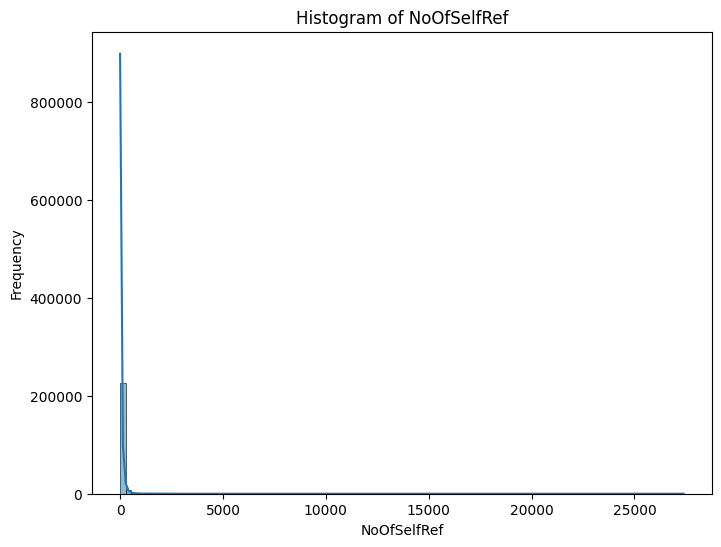

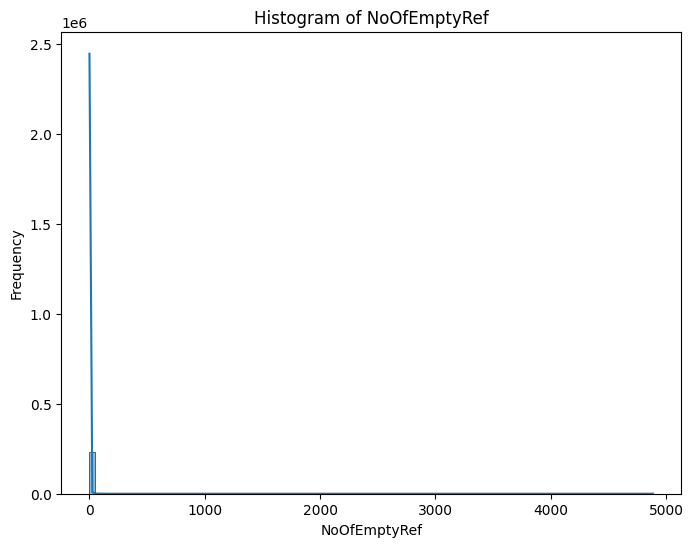

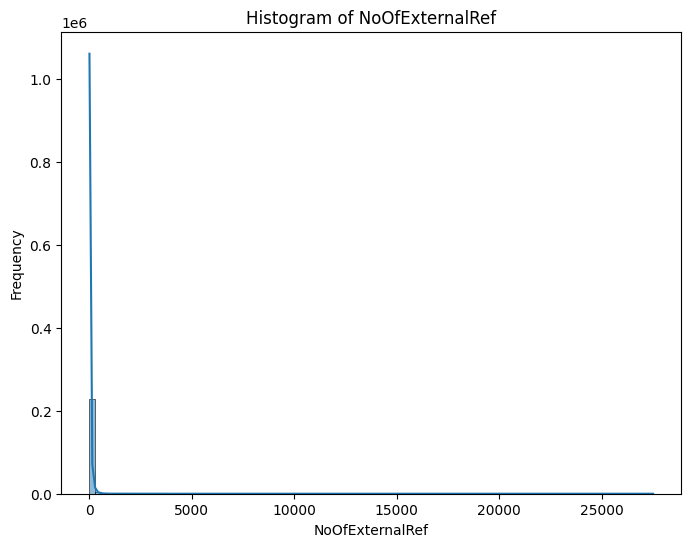

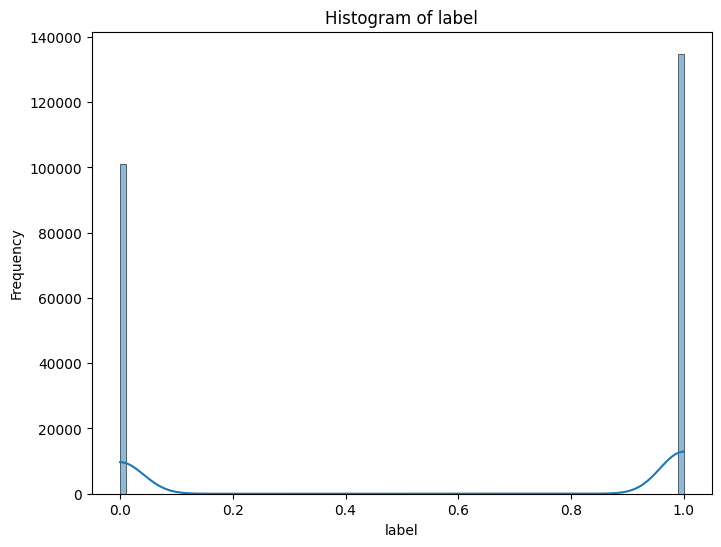

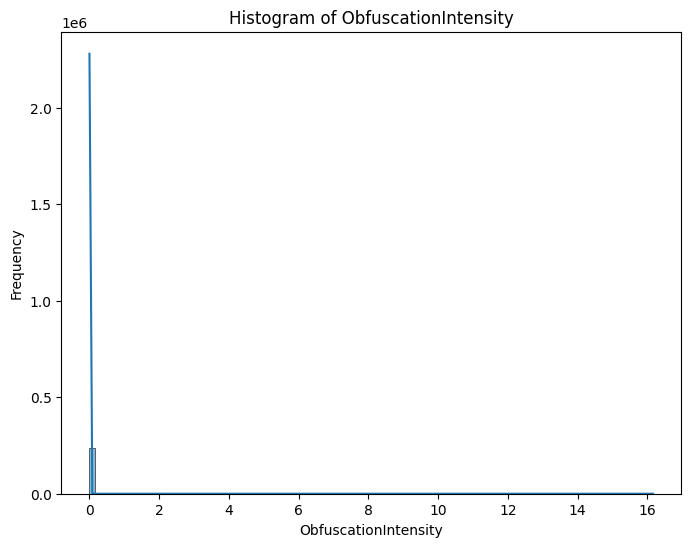

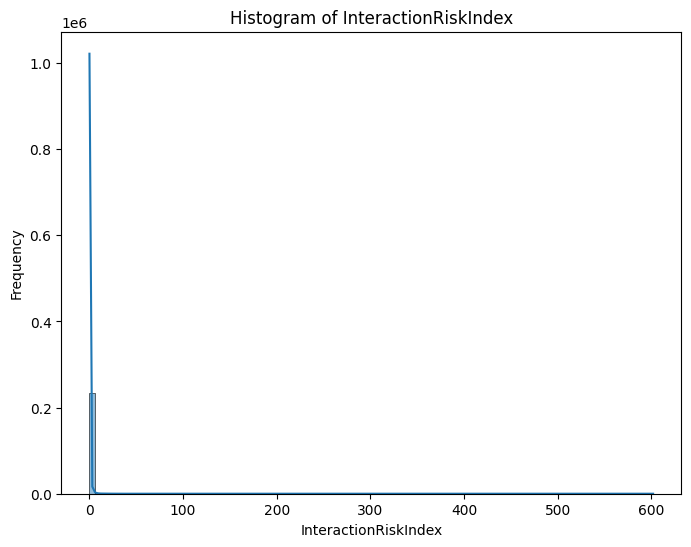

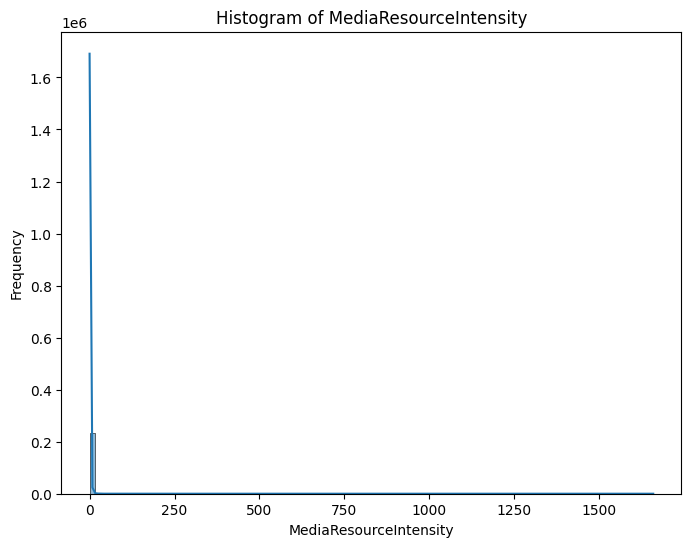

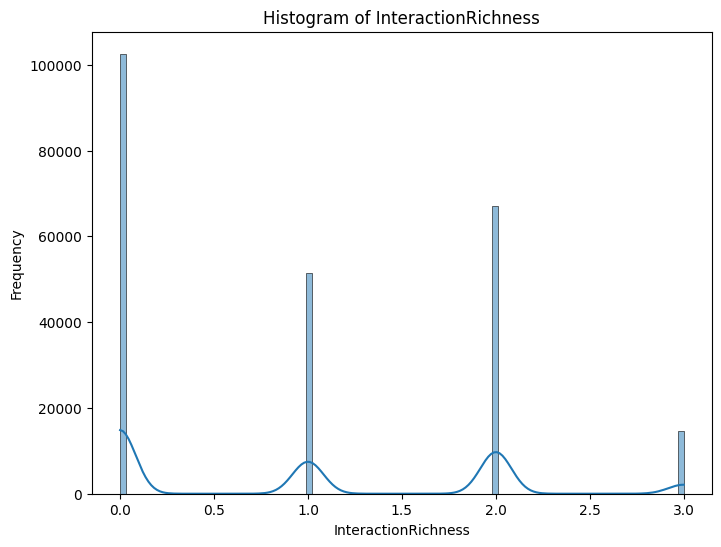

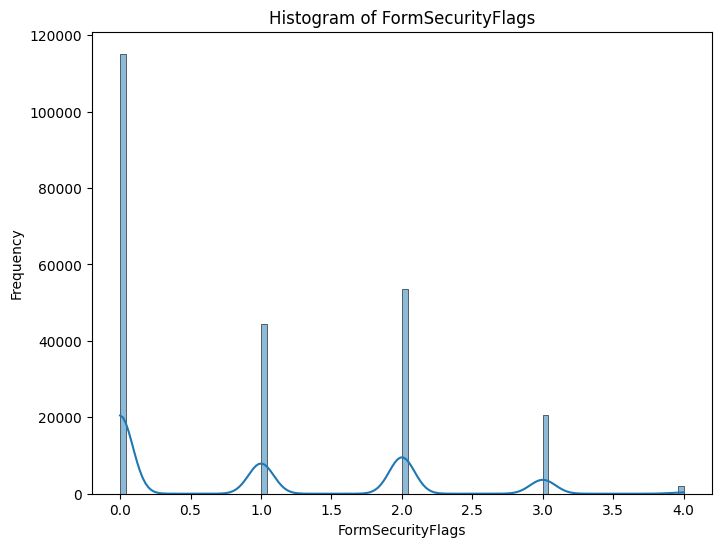

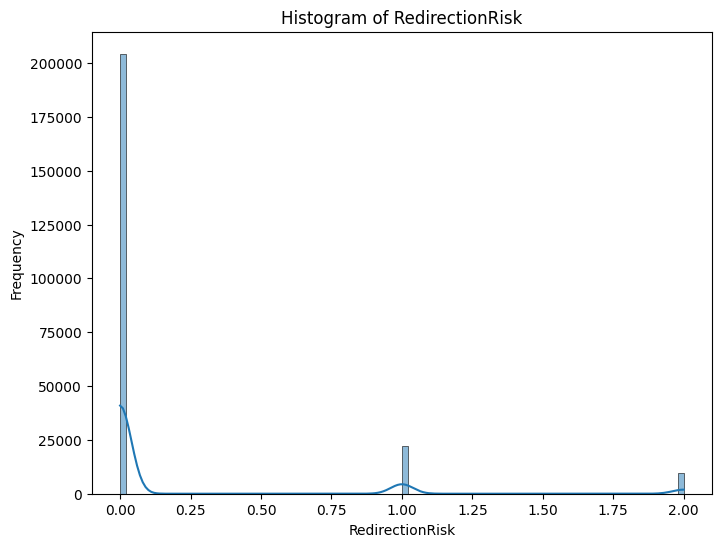

In [37]:
draw_histograms(df)

### Conclusion on feature engineering 

Histograms reveal the underlying distribution of data. 
Skewness in an histogram is synonym with abnormal distribution. 
The concerned variables are : 
- SpacialCharRatioInURL
- NoOfOtherSpecialCharsInURL
- NoOfLettersInURL

### Test de chi2

In [38]:
from scipy.stats import chi2_contingency

# Sélection des colonnes catégorielles (colonnes de type entier, sauf la variable cible 'label')
categorical_columns = [col for col in df.select_dtypes(include=['int']).columns if col != 'label']

# Effectuer le test de chi-deux pour chaque variable catégorielle par rapport à 'label'
chi2_results = {}

for col in categorical_columns:
    # Création d'une table de contingence entre la variable et la cible
    contingency_table = pd.crosstab(df[col], df['label'])
    
    # Test de chi-deux
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Stockage des résultats
    chi2_results[col] = {'chi2': chi2, 'p_value': p, 'dof': dof, 'expected_freq': expected}

# Affichage des résultats
for variable, result in chi2_results.items():
    print(f"Variable: {variable}")
    print(f"  Chi2: {result['chi2']}")
    print(f"  p-value: {result['p_value']}")
    print(f"  Degrees of Freedom: {result['dof']}")
    print(f"  Expected Frequencies:\n{result['expected_freq']}\n")


Variable: URLLength
  Chi2: 67407.06168244261
  p-value: 0.0
  Degrees of Freedom: 481
  Expected Frequencies:
[[2.14052461e+00 2.85947539e+00]
 [2.18333510e+01 2.91666490e+01]
 [1.01032762e+02 1.34967238e+02]
 [2.08058992e+02 2.77941008e+02]
 [8.27526814e+02 1.10547319e+03]
 [1.60539346e+03 2.14460654e+03]
 [2.78268199e+03 3.71731801e+03]
 [3.68255854e+03 4.91944146e+03]
 [4.83501699e+03 6.45898301e+03]
 [5.49387046e+03 7.33912954e+03]
 [5.92026296e+03 7.90873704e+03]
 [6.21394294e+03 8.30105706e+03]
 [6.28029920e+03 8.38970080e+03]
 [6.66174069e+03 8.89925931e+03]
 [5.99817806e+03 8.01282194e+03]
 [5.49387046e+03 7.33912954e+03]
 [4.77208556e+03 6.37491444e+03]
 [4.31572572e+03 5.76527428e+03]
 [3.58666303e+03 4.79133697e+03]
 [3.01813970e+03 4.03186030e+03]
 [2.69577669e+03 3.60122331e+03]
 [2.56392038e+03 3.42507962e+03]
 [1.85369431e+03 2.47630569e+03]
 [1.66361573e+03 2.22238427e+03]
 [1.50949795e+03 2.01650205e+03]
 [1.15888002e+03 1.54811998e+03]
 [9.91490999e+02 1.32450900e+03

### Feature selection

## Models

Some common imports :

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

X = df.drop(columns=['label'])  
y = df['label']

### Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.model_selection import KFold


# Préparation des données (conversion des colonnes non numériques)

# Identification des colonnes non numériques et application du Label Encoding
non_numeric_columns = [col for col in df.columns if df[col].dtype == 'object']
for col in non_numeric_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Séparation des caractéristiques et de la variable cible
X = df.drop('label', axis=1)
y = df['label']

# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Validation croisée avec KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
clf = svm.SVC(kernel='linear', C=1)  # Choix du noyau et du paramètre C

# Variables pour stocker les résultats de chaque itération
accuracies = []
reports = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Entraînement du modèle
    clf.fit(X_train, y_train)
    
    # Prédiction et évaluation
    y_pred = clf.predict(X_test)
    accuracies.append(clf.score(X_test, y_test))
    reports.append(classification_report(y_test, y_pred, output_dict=True))

# Calcul des scores moyens de la validation croisée
average_accuracy = np.mean(accuracies)
print(f"Accuracy moyenne sur les 10-folds: {average_accuracy}")


Accuracy moyenne sur les 10-folds: 0.9998303614784092


### Decision trees

### Random Forest

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


# Séparer les variables indépendantes (features) et la variable cible (target)
X = dfnum.drop(columns=['label'])  # Features (caractéristiques)
y = dfnum['label']                 # Cible (target)


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Initialiser le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100)

# Entraîner le modèle avec les données d'entraînement
rf_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Calculer et afficher l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Afficher un rapport de classification détaillé
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Accuracy: 0.9999010446853928
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30356
           1       1.00      1.00      1.00     40383

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739

[[30352     4]
 [    3 40380]]


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  cross_val_predict,cross_val_score

X = df.drop(columns=['label'])  
y = df['label']                


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
#cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

#print("Scores de validation croisée pour chaque pli :", cv_scores)
#print("Précision moyenne de la validation croisée :", cv_scores.mean())

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("précision du modèle")
print(accuracy)
print("Classification Report:")
print(class_report)
print("matrice de confusion")
print(conf_matrix)



précision du modèle
0.9993921316388413
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30168
           1       1.00      1.00      1.00     40571

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739

matrice de confusion
[[30138    30]
 [   13 40558]]


### Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = GaussianNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("précision du modèle")
print(accuracy)
print("Classification Report:")
print(class_report)
print("matrice de confusion")
print(conf_matrix)



précision du modèle
0.9368947822276255
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     30406
           1       0.90      1.00      0.95     40333

    accuracy                           0.94     70739
   macro avg       0.95      0.93      0.93     70739
weighted avg       0.94      0.94      0.94     70739

matrice de confusion
[[25960  4446]
 [   18 40315]]


### KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  GridSearchCV

X_knn = X.drop(columns=['FILENAME', 'URL']) # unique features for each individual
X_knn = X_knn.select_dtypes(exclude='object') # KNN based on distance so we select only numerical data

X_knn_train, X_knn_test, y_train, y_test = train_test_split(X_knn, y, test_size=0.2)

# sensitive to distance so data need to be scaled
scaler_knn = StandardScaler()
scaler_knn.fit_transform(X_knn_train)
scaler_knn.transform(X_knn_test)

# model
knn = KNeighborsClassifier(n_neighbors=10)

# hyperparameters to tune
param_grid = {'n_neighbors': [1,3,4,5,10,15]}
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=3)

# training 
grid_search.fit(X_knn_train, y_train)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_knn_test)


conf_matrix_knn = confusion_matrix(y_test, y_pred)
class_report_knn = classification_report(y_test, y_pred)
accuracy_knn = accuracy_score(y_test, y_pred)

print('nombre de voisin optimal')
print(grid_search.best_params_['n_neighbors'])
print("précision du modèle")
print(accuracy_knn)
print("Classification Report:")
print(class_report_knn)
print("matrice de confusion")
print(conf_matrix_knn)

nombre de voisin optimal
1
précision du modèle
0.9953349307661316
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20160
           1       1.00      1.00      1.00     26999

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

matrice de confusion
[[20045   115]
 [  105 26894]]


### Ensemble Methods

#### Boosting with Naive Bayes

#### Stacking with our best models

Let's stack the models with an accuracy > 0.99 : 

WARNING : about 2 hours to compile this cell.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X_stack = X.select_dtypes(exclude='object')
X_stack_train, X_stack_test, y_train, y_test = train_test_split(X_stack, y, test_size=0.2)

# sensitive to distance so data need to be scaled
scaler_knn = StandardScaler()
scaler_knn.fit_transform(X_stack_train)
scaler_knn.transform(X_stack_test)

# models 
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=1)),
    ('svm', SVC(kernel='linear', C=1)),
    ('logistic_regression', LogisticRegression()),
    ('decision_tree', RandomForestClassifier(n_estimators=100))
]

# stacking
stacking_model = StackingClassifier(estimators=estimators, cv=3)
stacking_model.fit(X_stack_train, y_train)
y_pred = stacking_model.predict(X_stack_test)

# results
conf_matrix_stack = confusion_matrix(y_test, y_pred)
class_report_stack = classification_report(y_test, y_pred)
accuracy_stack = accuracy_score(y_test, y_pred)

print("précision du modèle")
print(accuracy_stack)
print("Classification Report:")
print(class_report_stack)
print("matrice de confusion")
print(conf_matrix_stack)


c:\Users\eloua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\eloua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

précision du modèle
0.9998939756992302
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20089
           1       1.00      1.00      1.00     27070

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

matrice de confusion
[[20086     3]
 [    2 27068]]


In [10]:
from sklearn.metrics import f1_score

f1score_stack = f1_score(y_test, y_pred)

print("f1 score")
print(f1score_stack)

f1 score
0.9999076485473116


In [ ]:
import shap

# Créer un explainer SHAP pour le modèle de stacking
explainer = shap.Explainer(stacking_model, X_train)
shap_values = explainer(X_test)

# Afficher un résumé des importances des features avec SHAP
shap.summary_plot(shap_values, X_test, feature_names=data.feature_names)

ModuleNotFoundError: No module named 'shap'